In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Nëse e ke në të njëjtin folder me notebook-un:
df_ts = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_ts.csv')

# Shfaq disa rreshta për të parë strukturën
df_ts.head()


id          0          1          2          3          4  \
0  tt0062622    57057.0    65469.0    71642.0    73025.0    74060.0   
1  tt0064816     1923.0     2422.0     2853.0     2947.0     3054.0   
2  tt0088178   332925.0   302503.0   267264.0   261879.0   256608.0   
3  tt0145487   682857.0   407032.0    78058.0    81732.0    86772.0   
4  tt0359950  7813372.0  6274563.0  4781588.0  4655046.0  4535301.0   

           5          6          7          8  ...       93       94       95  \
0    49472.0    30258.0    28036.0    25824.0  ...  10709.0  11042.0  11388.0   
1     2844.0     2617.0     1998.0     1277.0  ...    637.0    734.0    857.0   
2   196530.0   112728.0   117384.0   123024.0  ...   6784.0   7253.0   7776.0   
3    83724.0    79940.0    39656.0     6974.0  ...  21094.0  10995.0   1586.0   
4  4650574.0  4758452.0  4069428.0  3471755.0  ...  88635.0  68347.0  45367.0   

        96       97       98       99  rating  \
0  11847.0  12404.0  13679.0  15056.0     8.3   
1    785.0    724.0    713.0    699.0     7.1   
2   9632.0  11212.0   9010.0   6431.0     8.7   
3   1421.0   1177.0    970.0    802.0     7.4   
4  28915.0  15494.0  16155.0  16853.0     7.3   

                               genre  rating_category  
0            ['Adventure', 'Sci-Fi']             High  
1      ['Crime', 'Drama', 'Romance']             High  
2           ['Documentary', 'Music']             High  
3  ['Action', 'Adventure', 'Sci-Fi']             High  
4   ['Adventure', 'Comedy', 'Drama']             High  

[5 rows x 104 columns]

In [12]:
# Informacion i përgjithshëm
df_ts.info()

# Statistika për kolonat numerike
df_ts.describe()

# Kontrollo nëse ka vlera që mungojnë
df_ts.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Columns: 104 entries, id to rating_category
dtypes: float64(101), object(3)
memory usage: 921.5+ KB


id                 0
0                  0
1                  0
2                  0
3                  0
                  ..
98                 0
99                 0
rating             0
genre              0
rating_category    0
Length: 104, dtype: int64

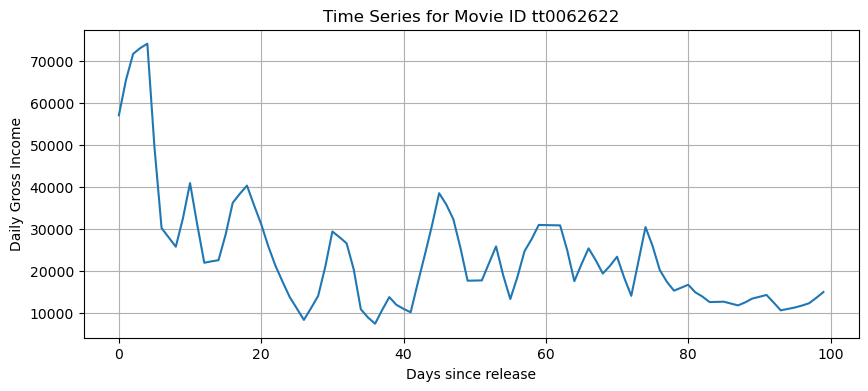

In [14]:
 #Zgjedh një film rastësor
sample = df_ts.iloc[0, 1:101]  # nga dita 0 deri në ditën 99

plt.figure(figsize=(10,4))
plt.plot(sample.values)
plt.title(f'Time Series for Movie ID {df_ts.iloc[0, 0]}')
plt.xlabel('Days since release')
plt.ylabel('Daily Gross Income')
plt.grid(True)
plt.show()


In [41]:
df_ts.shape


(1134, 104)

In [16]:
# Sa genre të ndryshëm kemi
df_ts['genre'].nunique()


184

In [18]:
# Sa filma për çdo genre
genre_counts = df_ts['genre'].value_counts()

# Print
print(genre_counts)

genre
['Animation', 'Adventure', 'Comedy']    69
['Action', 'Adventure', 'Sci-Fi']       52
['Comedy', 'Drama']                     45
['Horror', 'Mystery', 'Thriller']       40
['Action', 'Adventure', 'Comedy']       35
                                        ..
['Drama', 'History', 'Romance']          1
['Action', 'Romance', 'Sci-Fi']          1
['Action', 'Drama', 'Mystery']           1
['Mystery', 'Sci-Fi', 'Thriller']        1
['Documentary', 'Action', 'Mystery']     1
Name: count, Length: 184, dtype: int64


In [20]:
from collections import Counter

# Krijo një listë me të gjithë zhanrat individualë
all_genres = df_ts['genre'].apply(eval).explode()

# Numëro sa herë shfaqet çdo zhanër
genre_freq = Counter(all_genres)

# Shndërro në dataframe për lehtësi vizualizimi
genre_df = pd.DataFrame.from_dict(genre_freq, orient='index', columns=['count']).sort_values('count', ascending=False)


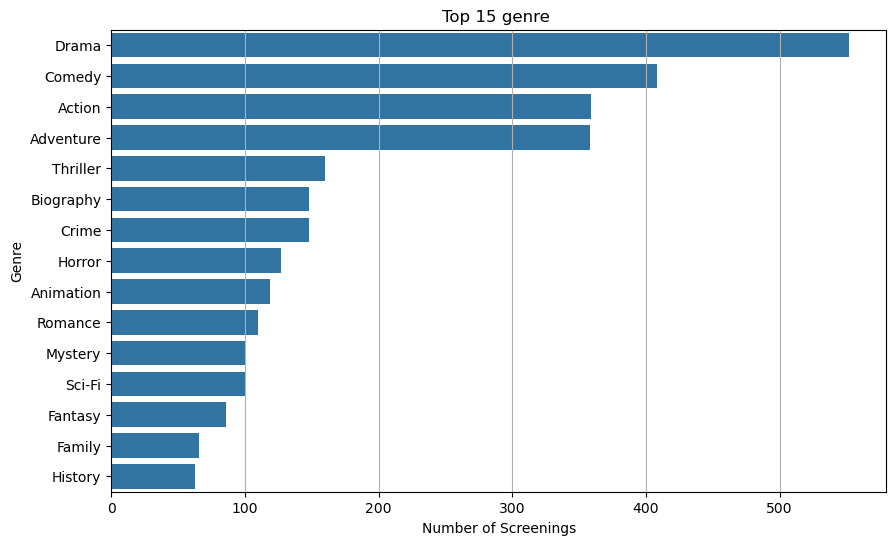

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_df['count'].values[:15], y=genre_df.index[:15])
plt.title("Top 15 genre ")
plt.xlabel("Number of Screenings")
plt.ylabel("Genre")
plt.grid(axis='x')
plt.show()


In [24]:
# Sigurohu që genre është listë (nëse nuk është tashmë)
df_ts['genre'] = df_ts['genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Ruaj vetëm zhanrin e parë si 'main_genre'
df_ts['main_genre'] = df_ts['genre'].apply(lambda genres: genres[0] if isinstance(genres, list) and genres else None)


In [26]:
df_ts['main_genre'].value_counts()  


main_genre
Action         323
Comedy         204
Drama          151
Biography      125
Animation      119
Adventure       73
Horror          66
Crime           40
Documentary     27
Fantasy          3
Musical          2
Mystery          1
Name: count, dtype: int64

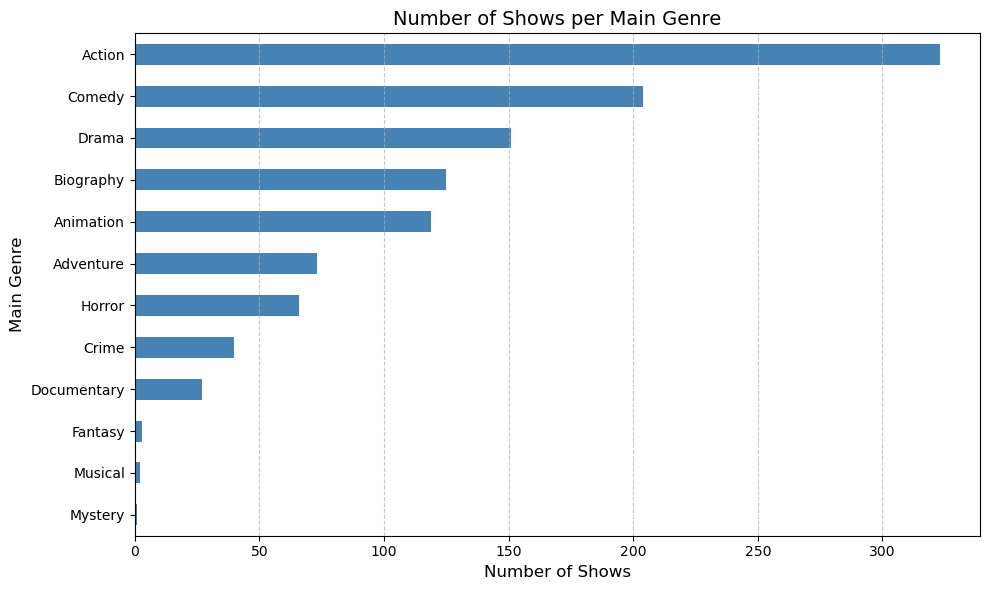

In [28]:
import matplotlib.pyplot as plt

# Merr numrin e shfaqjeve për çdo zhanër kryesor
main_genre_counts = df_ts['main_genre'].value_counts()

# Krijo një grafik horizontal
plt.figure(figsize=(10, 6))
main_genre_counts.plot(kind='barh', color='steelblue')

# Shto tituj dhe etiketa
plt.title('Number of Shows per Main Genre', fontsize=14)
plt.xlabel('Number of Shows', fontsize=12)
plt.ylabel('Main Genre', fontsize=12)

# Rrotullo aksin horizontal për të lexuar më mirë
plt.gca().invert_yaxis()  # Zhanret me numër më të madh sipër
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


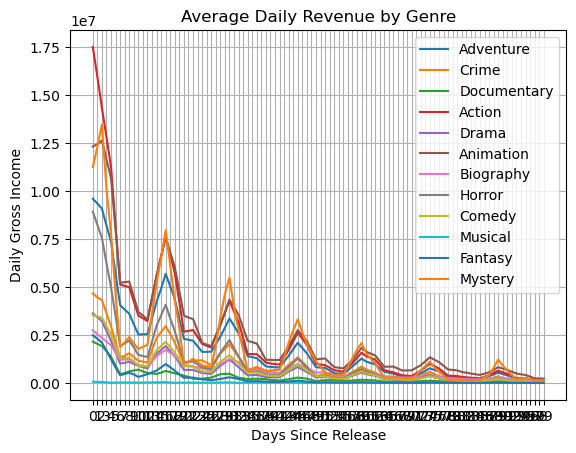

In [57]:
import matplotlib.pyplot as plt

# Example: Average daily revenue per genre
genres = df_ts['main_genre'].unique()

for genre in genres:
    # Filter the dataset for the current genre and select only the time series columns (assuming columns 1 to 100 are daily income)
    genre_series = df_ts[df_ts['main_genre'] == genre].iloc[:, 1:101]
    
    # Calculate the mean time series for the genre
    mean_ts = genre_series.mean()
    
    # Plot the mean time series
    plt.plot(mean_ts, label=genre)

# Plot settings
plt.title("Average Daily Revenue by Genre")
plt.xlabel("Days Since Release")
plt.ylabel("Daily Gross Income")
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Sa ilma për çdo genre
genre_counts = df_ts['main_genre'].value_counts()

# Print
print(genre_counts)


main_genre
Action         323
Comedy         204
Drama          151
Biography      125
Animation      119
Adventure       73
Horror          66
Crime           40
Documentary     27
Fantasy          3
Musical          2
Mystery          1
Name: count, dtype: int64


In [61]:
rating_category_counts=df_ts['rating_category'].value_counts()
print(rating_category_counts) 

rating_category
Medium         387
High           377
Medium High    232
Medium Low     128
Low             10
Name: count, dtype: int64


In [63]:
df_ts

id          0          1          2          3          4  \
0     tt0062622    57057.0    65469.0    71642.0    73025.0    74060.0   
1     tt0064816     1923.0     2422.0     2853.0     2947.0     3054.0   
2     tt0088178   332925.0   302503.0   267264.0   261879.0   256608.0   
3     tt0145487   682857.0   407032.0    78058.0    81732.0    86772.0   
4     tt0359950  7813372.0  6274563.0  4781588.0  4655046.0  4535301.0   
...         ...        ...        ...        ...        ...        ...   
1129  tt9731534  1077363.0  1061148.0  1043451.0   912840.0   738595.0   
1130  tt9735462    56775.0    57750.0    58828.0    53549.0    48484.0   
1131  tt9764362  3595005.0  3401235.0  3221227.0  2645775.0  2188725.0   
1132  tt9784798   528167.0   617409.0   696127.0   741481.0   802782.0   
1133  tt9883996   260429.0   296061.0   327698.0   265172.0   206614.0   

              5          6          7          8  ...        94        95  \
0       49472.0    30258.0    28036.0    25824.0  ...   11042.0   11388.0   
1        2844.0     2617.0     1998.0     1277.0  ...     734.0     857.0   
2      196530.0   112728.0   117384.0   123024.0  ...    7253.0    7776.0   
3       83724.0    79940.0    39656.0     6974.0  ...   10995.0    1586.0   
4     4650574.0  4758452.0  4069428.0  3471755.0  ...   68347.0   45367.0   
...         ...        ...        ...        ...  ...       ...       ...   
1129   508118.0   296236.0   318113.0   341113.0  ...    2425.0    2461.0   
1130    37340.0    19243.0    30804.0    55897.0  ...     618.0     488.0   
1131  1681250.0  1030698.0  1138724.0  1290788.0  ...  257388.0  182883.0   
1132   527997.0   177249.0   141753.0   100026.0  ...   10511.0   10878.0   
1133   120542.0    63093.0    82683.0    98308.0  ...    3427.0    1437.0   

            96        97        98        99  rating  \
0      11847.0   12404.0   13679.0   15056.0     8.3   
1        785.0     724.0     713.0     699.0     7.1   
2       9632.0   11212.0    9010.0    6431.0     8.7   
3       1421.0    1177.0     970.0     802.0     7.4   
4      28915.0   15494.0   16155.0   16853.0     7.3   
...        ...       ...       ...       ...     ...   
1129    2223.0    1920.0    1991.0    2051.0     6.4   
1130     636.0     883.0     904.0     920.0     6.3   
1131  165311.0  144119.0  128009.0  111756.0     7.2   
1132    7491.0    3752.0    5237.0    6592.0     7.4   
1133    1650.0    1826.0    2176.0    2417.0     6.9   

                            genre  rating_category   main_genre  
0             [Adventure, Sci-Fi]             High    Adventure  
1         [Crime, Drama, Romance]             High        Crime  
2            [Documentary, Music]             High  Documentary  
3     [Action, Adventure, Sci-Fi]             High       Action  
4      [Adventure, Comedy, Drama]             High    Adventure  
...                           ...              ...          ...  
1129  [Horror, Mystery, Thriller]           Medium       Horror  
1130   [Biography, Comedy, Drama]           Medium    Biography  
1131   [Comedy, Horror, Thriller]             High       Comedy  
1132  [Biography, Drama, History]             High    Biography  
1133   [Biography, Comedy, Drama]      Medium High    Biography  

[1134 rows x 105 columns]

### standart scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Zgjedh vetëm kolonat e time series (ditët 0 deri 99)
ts_data = df_ts.loc[:, '0':'99']

# Inicioni scaler
scaler = MinMaxScaler()

# Apliko normalizimin
ts_scaled = scaler.fit_transform(ts_data)

# Krijo dataframe të normalizuar me të njëjtat emra kolonash
df_scaled = pd.DataFrame(ts_scaled, columns=[str(i) for i in range(100)])

# Shto kolonat ndihmëse (p.sh. main_genre) për analizë më tej
df_scaled['main_genre'] = df_ts['main_genre'].values
df_scaled['rating'] = df_ts['rating'].values
df_scaled['rating_category'] = df_ts['rating_category'].values


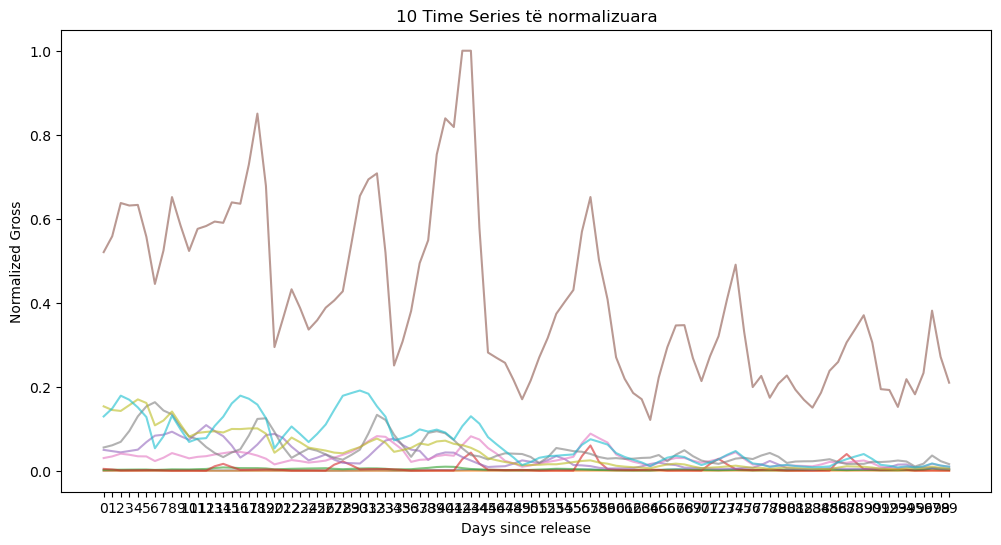

In [68]:
plt.figure(figsize=(12,6))

# Zgjedh 10 time series të rastësishme
for i in range(10):
    plt.plot(df_scaled.iloc[i, :100], alpha=0.6, label=f"Movie {i}")

plt.title("10 Time Series të normalizuara")
plt.xlabel("Days since release")
plt.ylabel("Normalized Gross")
plt.grid(False)
plt.show()


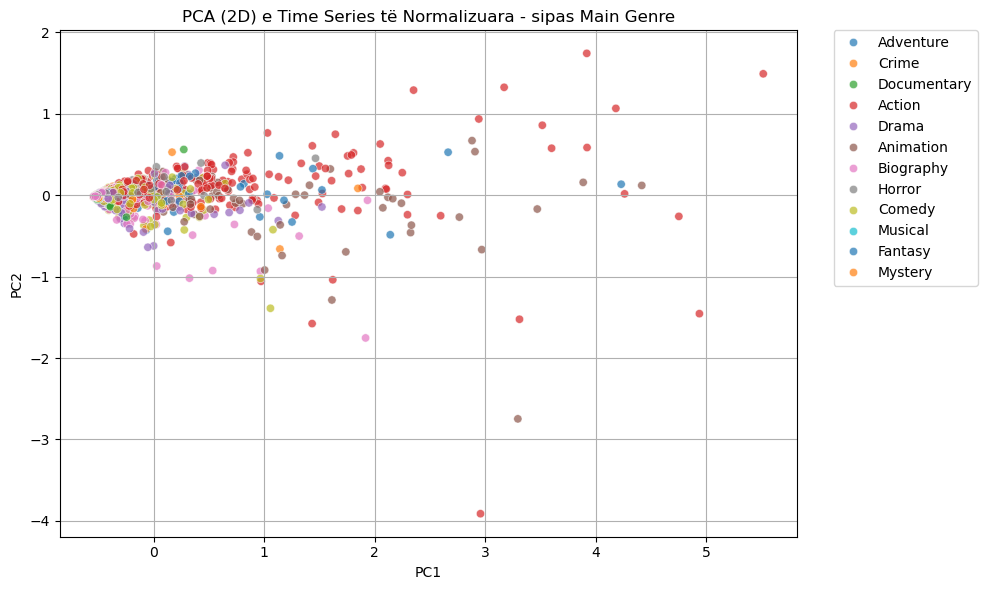

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Marrim vetëm kolonat e time series (0-99)
X = df_scaled.iloc[:, :100]

# Apliko PCA me 2 komponentë
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Krijo DataFrame për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['main_genre'] = df_scaled['main_genre'].values

# Vizato scatterplot-in
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='main_genre', alpha=0.7, palette='tab10')
plt.title('PCA (2D) e Time Series të Normalizuara - sipas Main Genre')
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


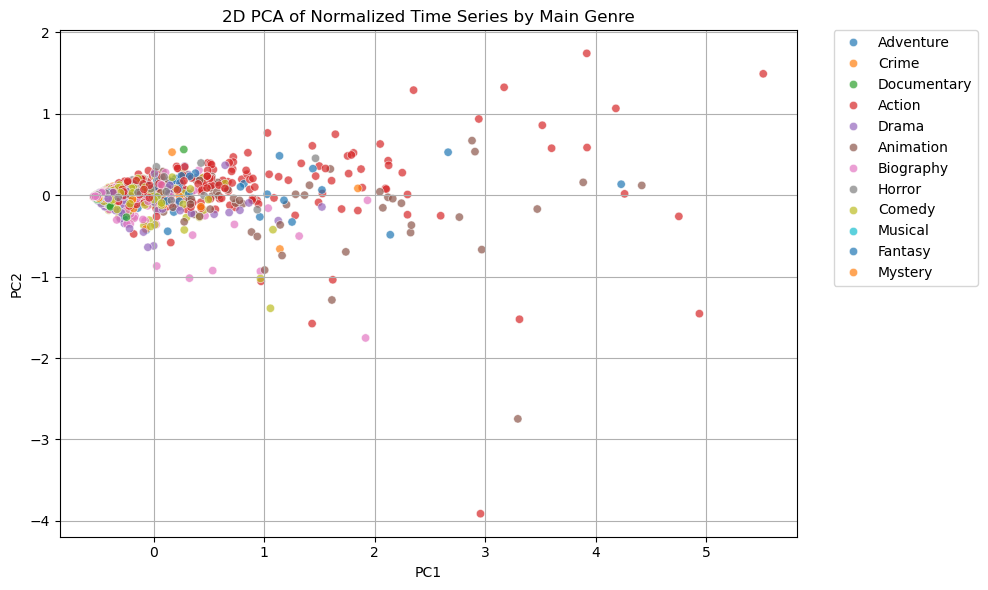

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only the time series columns (assumed to be the first 100 columns)
X = df_scaled.iloc[:, :100]

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['main_genre'] = df_scaled['main_genre'].values

# Plot the 2D PCA scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='main_genre', alpha=0.7, palette='tab10')

# Set plot title and formatting
plt.title('2D PCA of Normalized Time Series by Main Genre')
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


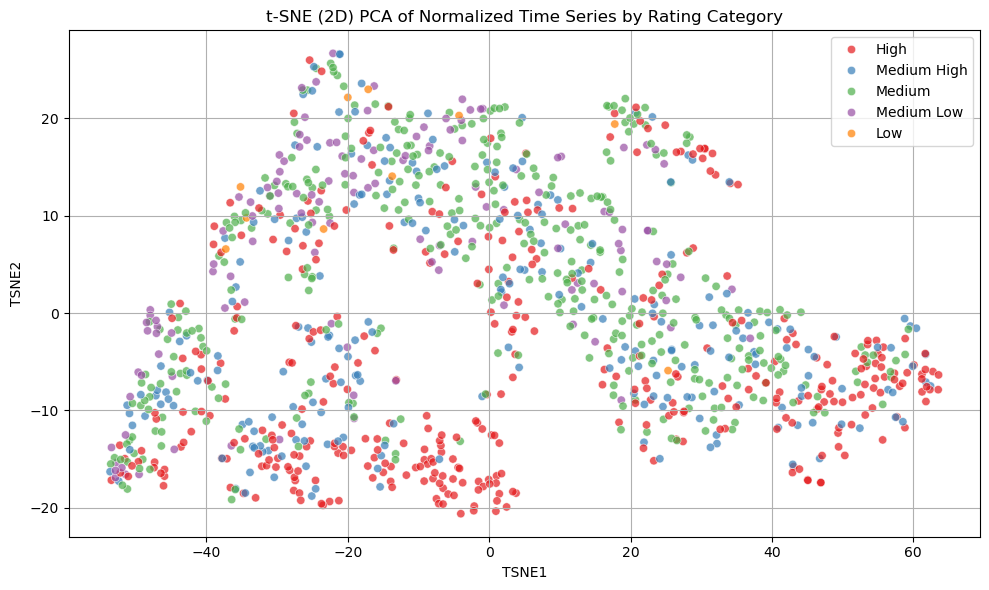

In [74]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Marrim vetëm kolonat e time series
X = df_scaled.iloc[:, :100]
y = df_scaled['rating_category']

# Apliko t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# DataFrame për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['rating_category'] = y.values

# Vizatim
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='rating_category', alpha=0.7, palette='Set1')
plt.title('t-SNE (2D) PCA of Normalized Time Series by Rating Category')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Motifs

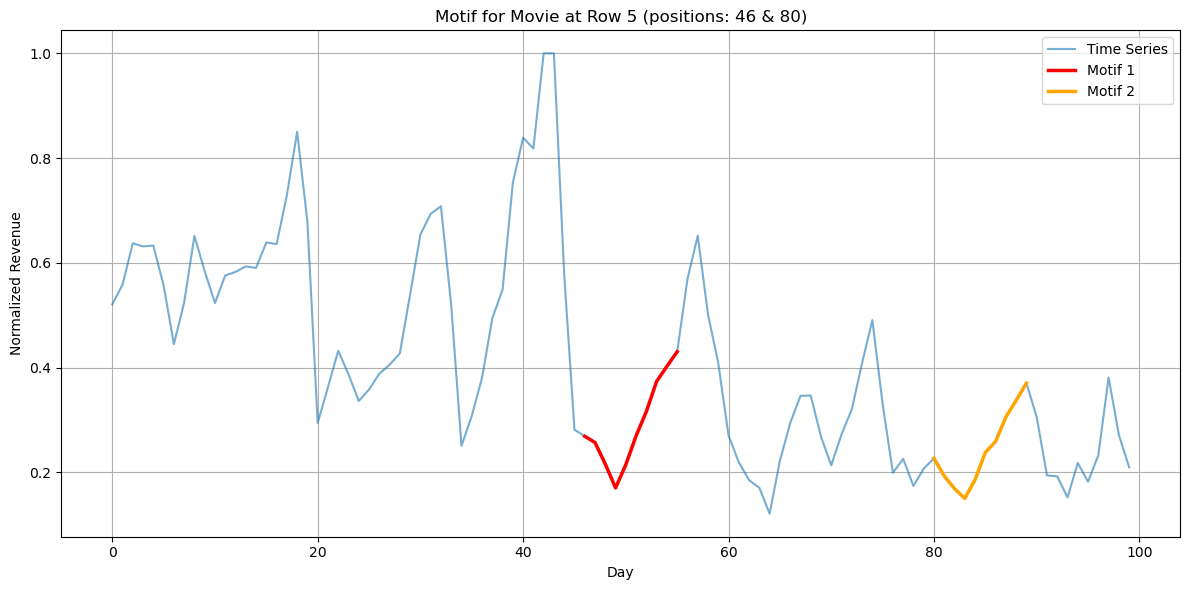

In [44]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Select a row (movie) from df_scaled
i = 5  # change this to test different movies

# Extract only the day columns (0–99) and ensure the values are float64
ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')

# Define the subsequence length for motif search (try 10, 15, 20)
m = 10

# Compute the matrix profile
mp = stumpy.stump(ts, m)

# Find the indices of the two most similar subsequences (motif pair)
motif_idx = np.argsort(mp[:, 0])[0]
pair_idx = int(mp[motif_idx, 1])

# Plot the time series and highlight the motif pair
plt.figure(figsize=(12,6))
plt.plot(ts, label='Time Series', alpha=0.6)
plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m], color='red', linewidth=2.5, label='Motif 1')
plt.plot(np.arange(pair_idx, pair_idx + m), ts[pair_idx:pair_idx + m], color='orange', linewidth=2.5, label='Motif 2')
plt.title(f'Motif for Movie at Row {i} (positions: {motif_idx} & {pair_idx})')
plt.xlabel('Day')
plt.ylabel('Normalized Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


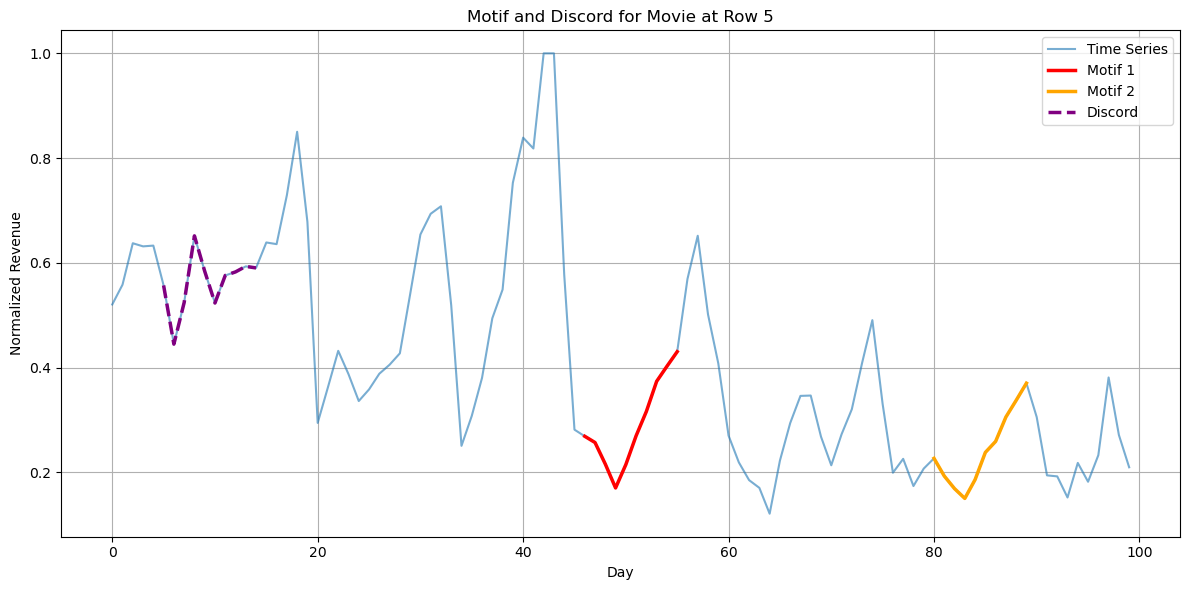

In [45]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Select a row (movie) from df_scaled
i = 5  # change this to test different movies

# Extract only the day columns (0–99) and ensure the values are float64
ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')

# Define the subsequence length
m = 10

# Compute the matrix profile
mp = stumpy.stump(ts, m)

# --- Motif ---
# Find the indices of the most similar subsequences (motif pair)
motif_idx = np.argsort(mp[:, 0])[0]
pair_idx = int(mp[motif_idx, 1])

# --- Discord ---
# Find the index of the most dissimilar subsequence
discord_idx = np.argmax(mp[:, 0])

# Plot the time series with motif pair and discord highlighted
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Time Series', alpha=0.6)

# Plot motif pair
plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m], color='red', linewidth=2.5, label='Motif 1')
plt.plot(np.arange(pair_idx, pair_idx + m), ts[pair_idx:pair_idx + m], color='orange', linewidth=2.5, label='Motif 2')

# Plot discord
plt.plot(np.arange(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m], color='purple', linewidth=2.5, linestyle='--', label='Discord')

# Final plot formatting
plt.title(f'Motif and Discord for Movie at Row {i}')
plt.xlabel('Day')
plt.ylabel('Normalized Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


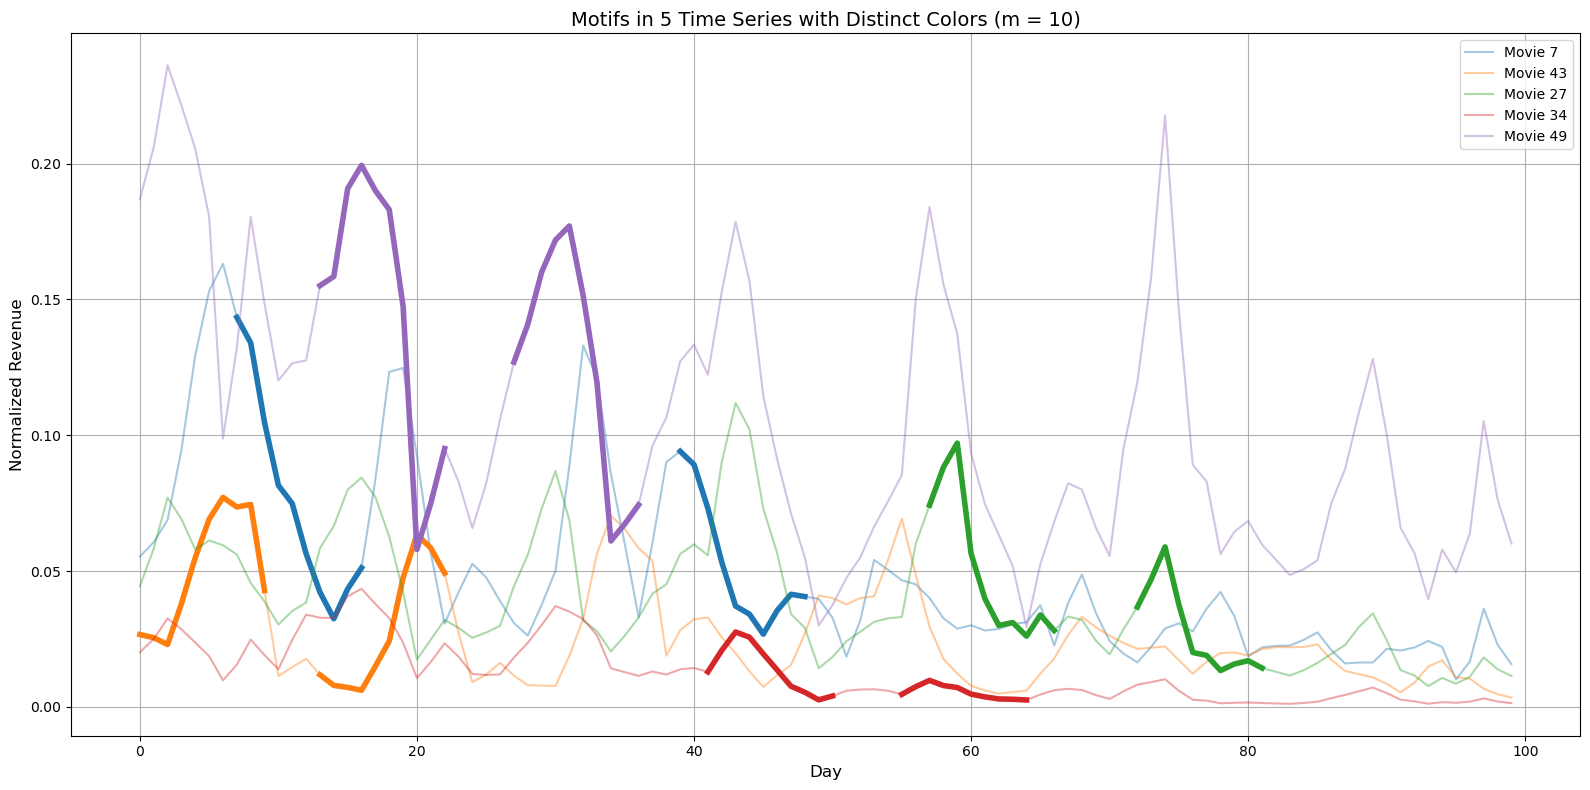

In [46]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
m = 10  # Subsequence length
indices = [7, 43, 27, 34, 49]  # Row indices (movies)
colors = sns.color_palette('tab10', n_colors=len(indices))  # Distinct colors

plt.figure(figsize=(16, 8))

for i, idx in enumerate(indices):
    # Extract the time series for the current movie
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values.astype('float64')

    # Compute the matrix profile
    mp = stumpy.stump(ts, m)

    # Find motif pair indices
    motif_idx = np.argsort(mp[:, 0])[0]
    pair_idx = int(mp[motif_idx, 2])

    # Assign a unique color for this movie
    color = colors[i]

    # Plot the entire time series
    plt.plot(ts, color=color, alpha=0.4, label=f'Movie {idx}')

    # Highlight the motif pair with thicker lines
    plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m],
             color=color, linewidth=4)
    plt.plot(np.arange(pair_idx, pair_idx + m), ts[pair_idx:pair_idx + m],
             color=color, linewidth=4)

# Final plot formatting
plt.title(f'Motifs in 5 Time Series with Distinct Colors (m = {m})', fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Normalized Revenue", fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


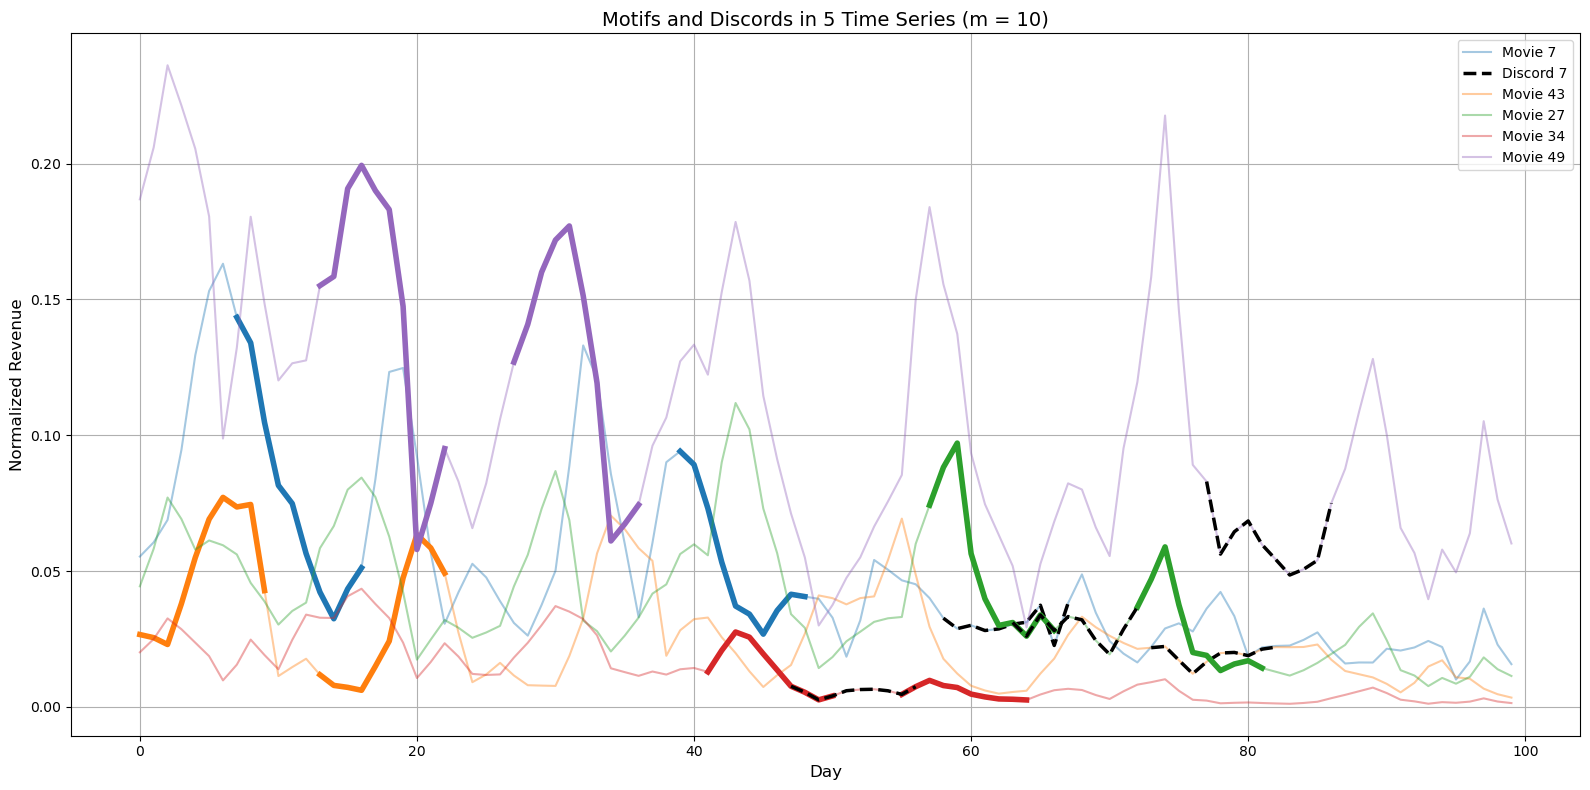

In [47]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
m = 10  # Subsequence length
indices = [7, 43, 27, 34, 49]  # Row indices (movies)
colors = sns.color_palette('tab10', n_colors=len(indices))  # Distinct motif colors

plt.figure(figsize=(16, 8))

for i, idx in enumerate(indices):
    # Extract the time series for the current movie
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values.astype('float64')

    # Compute the matrix profile
    mp = stumpy.stump(ts, m)

    # Find motif indices
    motif_idx = np.argsort(mp[:, 0])[0]
    pair_idx = int(mp[motif_idx, 2])

    # Find discord index (most dissimilar subsequence)
    discord_idx = np.argmax(mp[:, 0])

    # Assign unique color for motifs
    color = colors[i]

    # Plot the entire time series
    plt.plot(ts, color=color, alpha=0.4, label=f'Movie {idx}')

    # Highlight motif pair
    plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m],
             color=color, linewidth=4)
    plt.plot(np.arange(pair_idx, pair_idx + m), ts[pair_idx:pair_idx + m],
             color=color, linewidth=4)

    # Highlight discord (anomaly) in black with dashed line
    plt.plot(np.arange(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m],
             color='black', linewidth=2.5, linestyle='--', label=f'Discord {idx}' if i == 0 else "")

# Final plot formatting
plt.title(f'Motifs and Discords in 5 Time Series (m = {m})', fontsize=14)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Normalized Revenue", fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
import stumpy
import numpy as np
import pandas as pd
from tqdm import tqdm

# Parameters
m = 10  # subsequence length
discord_scores = []

# Loop through all movies (or a subset)
for idx in tqdm(df_scaled.index):
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values.astype('float64')
    
    # Compute matrix profile
    mp = stumpy.stump(ts, m)
    
    # Max value in matrix profile = strongest discord
    max_discord = np.max(mp[:, 0])
    
    discord_scores.append((idx, max_discord))

# Convert to DataFrame and sort
discord_df = pd.DataFrame(discord_scores, columns=['movie_idx', 'discord_score'])
discord_df_sorted = discord_df.sort_values(by='discord_score', ascending=False)

# Show top 10 most anomalous movies
print(discord_df_sorted.head(10))


100%|██████████████████████████████████████| 1134/1134 [00:01<00:00, 619.44it/s]


      movie_idx       discord_score
382         382   3.614658541552516
851         851  3.5551819420956274
366         366   3.523433344989687
7             7   3.433596959997161
172         172   3.430958273378772
933         933   3.423649895152604
236         236  3.4192179766801374
894         894    3.39169091076685
433         433  3.3912855364718246
1047       1047  3.3732978863740337


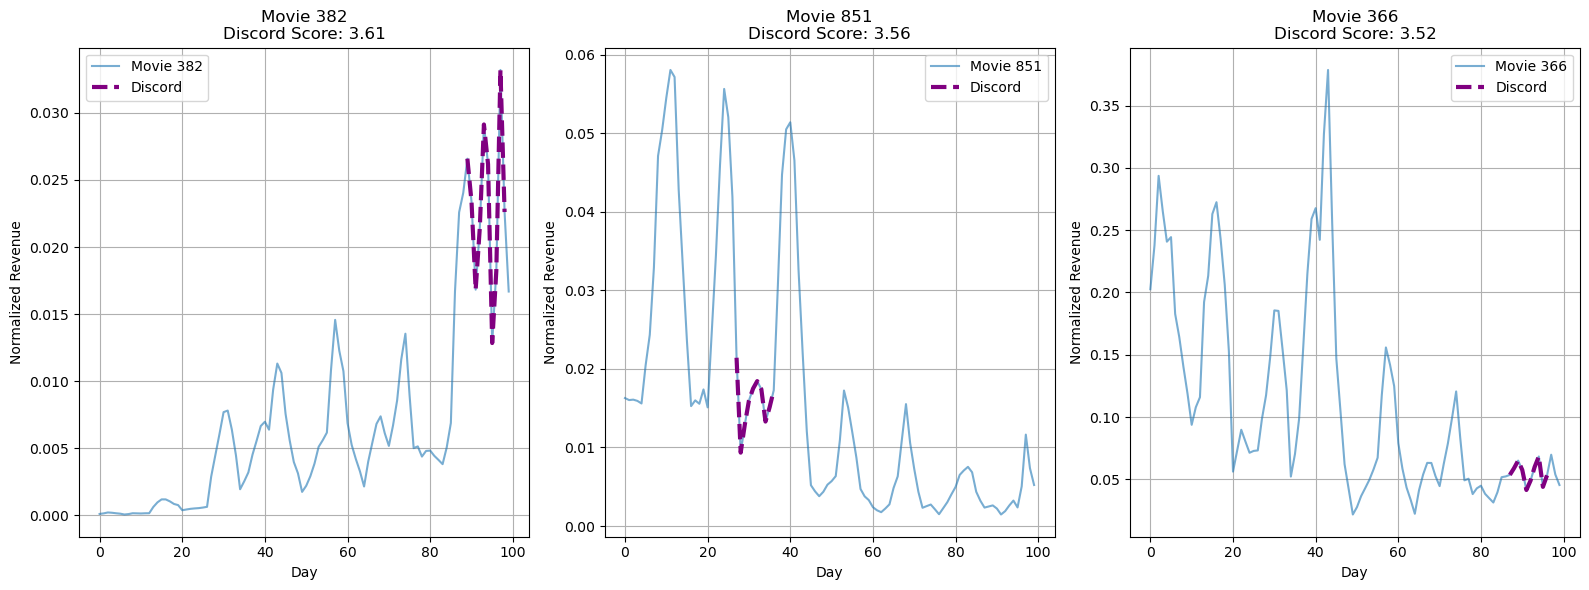

In [49]:
top_anomalies = discord_df_sorted.head(3)

plt.figure(figsize=(16, 6))

for i, row in enumerate(top_anomalies.itertuples(), 1):
    idx = row.movie_idx
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values.astype('float64')
    mp = stumpy.stump(ts, m)
    discord_idx = np.argmax(mp[:, 0])

    plt.subplot(1, 3, i)
    plt.plot(ts, label=f'Movie {idx}', alpha=0.6)
    plt.plot(np.arange(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m],
             color='purple', linewidth=3, linestyle='--', label='Discord')
    plt.title(f'Movie {idx}\nDiscord Score: {row.discord_score:.2f}')
    plt.xlabel("Day")
    plt.ylabel("Normalized Revenue")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [50]:
pip install tslearn


Note: you may need to restart the kernel to use updated packages.


In [51]:
!pip install "sktime[all]"




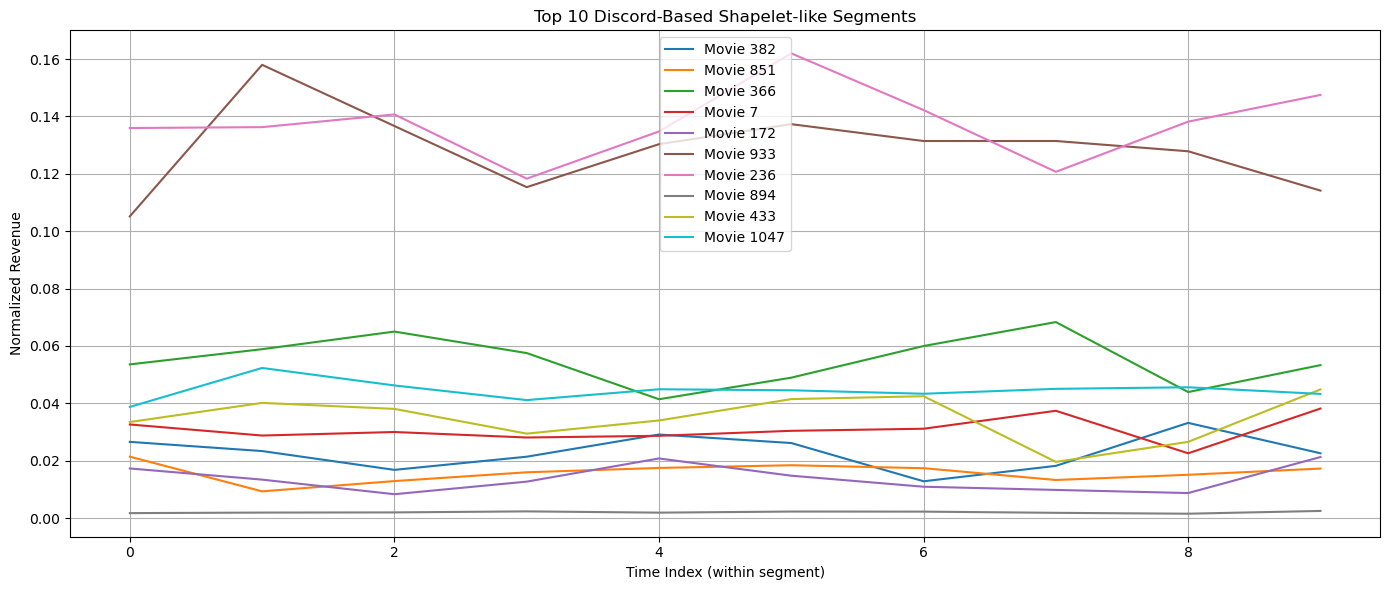

In [52]:
import matplotlib.pyplot as plt
import stumpy

# Parameters
m = 10  # subsequence length
top_idxs = discord_df_sorted.head(10)['movie_idx'].values

shapelet_like_segments = []

# Extract most anomalous subsequence (discord) from each
for idx in top_idxs:
    ts = df_scaled.loc[idx, [str(i) for i in range(100)]].values.astype('float64')
    mp = stumpy.stump(ts, m)
    discord_idx = np.argmax(mp[:, 0])
    segment = ts[discord_idx:discord_idx + m]
    shapelet_like_segments.append((idx, segment))

# Plot them
plt.figure(figsize=(14, 6))
for i, (idx, segment) in enumerate(shapelet_like_segments):
    plt.plot(segment, label=f'Movie {idx}')

plt.title('Top 10 Discord-Based Shapelet-like Segments')
plt.xlabel('Time Index (within segment)')
plt.ylabel('Normalized Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


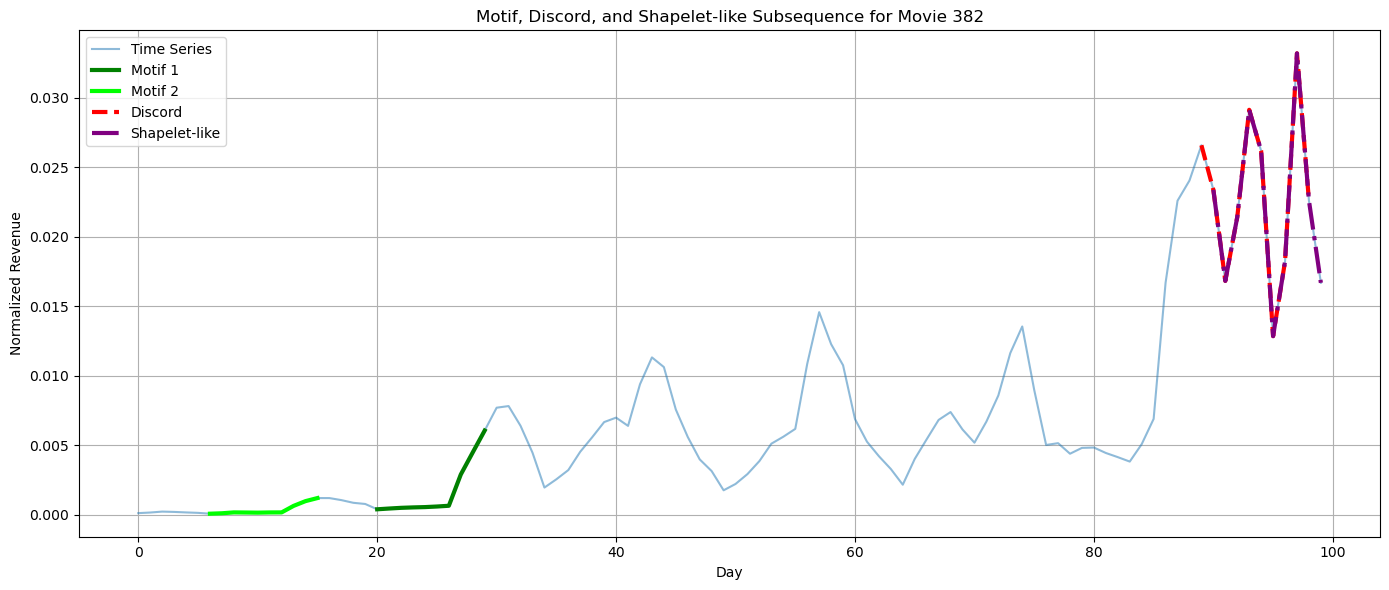

In [53]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
i = 382  # Movie index
m = 10   # subsequence length

# Extract the time series
ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')

# Compute matrix profile
mp = stumpy.stump(ts, m)

# Motif pair: most similar subsequences
motif_idx = np.argsort(mp[:, 0])[0]
motif_pair_idx = int(mp[motif_idx, 1])

# Discord: most dissimilar subsequence
discord_idx = np.argmax(mp[:, 0])

# Shapelet-like: based on peak value
shapelet_start = np.argmax(ts)
shapelet_start = max(0, min(shapelet_start - m // 2, len(ts) - m))
shapelet_segment = ts[shapelet_start:shapelet_start + m]

# Plot everything
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Time Series', alpha=0.5)

# Plot motif pair
plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m],
         color='green', linewidth=3, label='Motif 1')
plt.plot(np.arange(motif_pair_idx, motif_pair_idx + m), ts[motif_pair_idx:motif_pair_idx + m],
         color='lime', linewidth=3, label='Motif 2')

# Plot discord
plt.plot(np.arange(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m],
         color='red', linestyle='--', linewidth=3, label='Discord')

# Plot shapelet-like subsequence
plt.plot(np.arange(shapelet_start, shapelet_start + m), shapelet_segment,
         color='purple', linestyle='-.', linewidth=3, label='Shapelet-like')

# Finalize plot
plt.title(f'Motif, Discord, and Shapelet-like Subsequence for Movie {i}')
plt.xlabel('Day')
plt.ylabel('Normalized Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


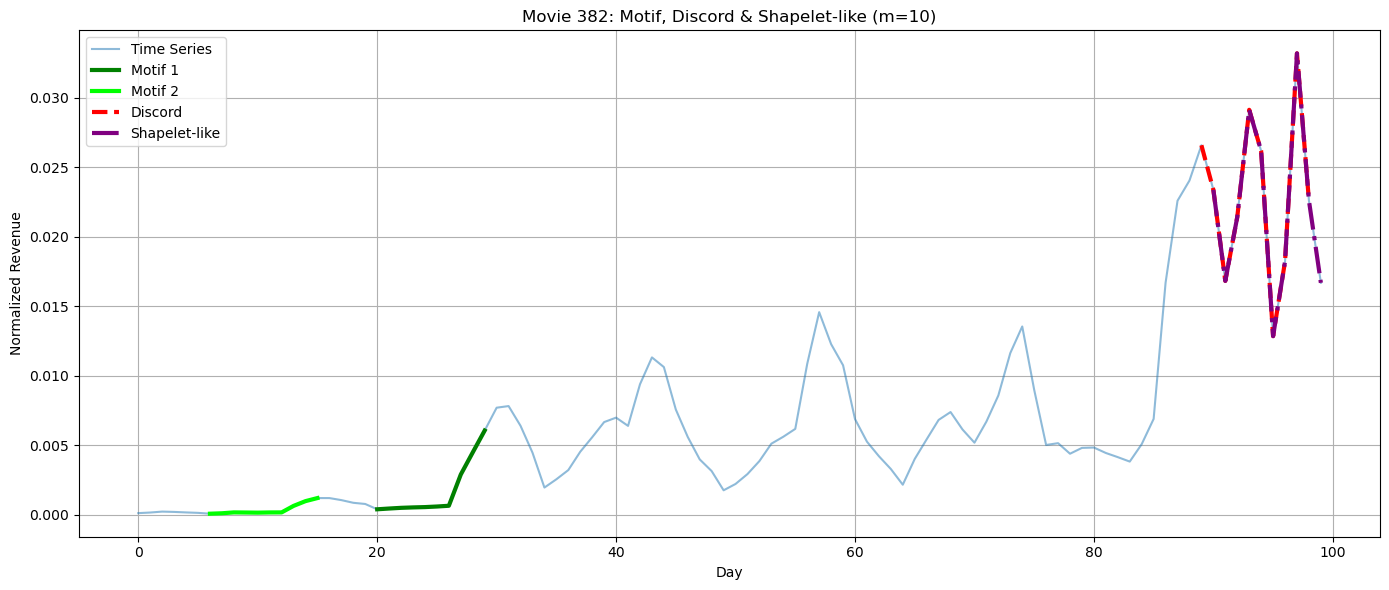

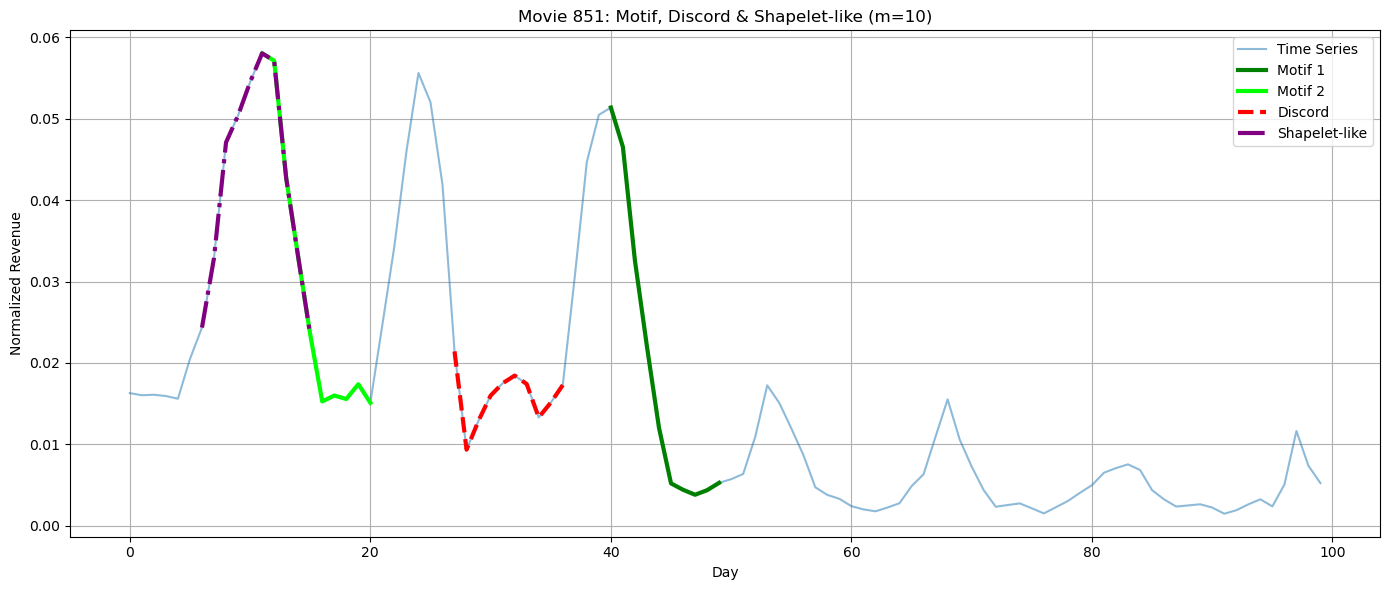

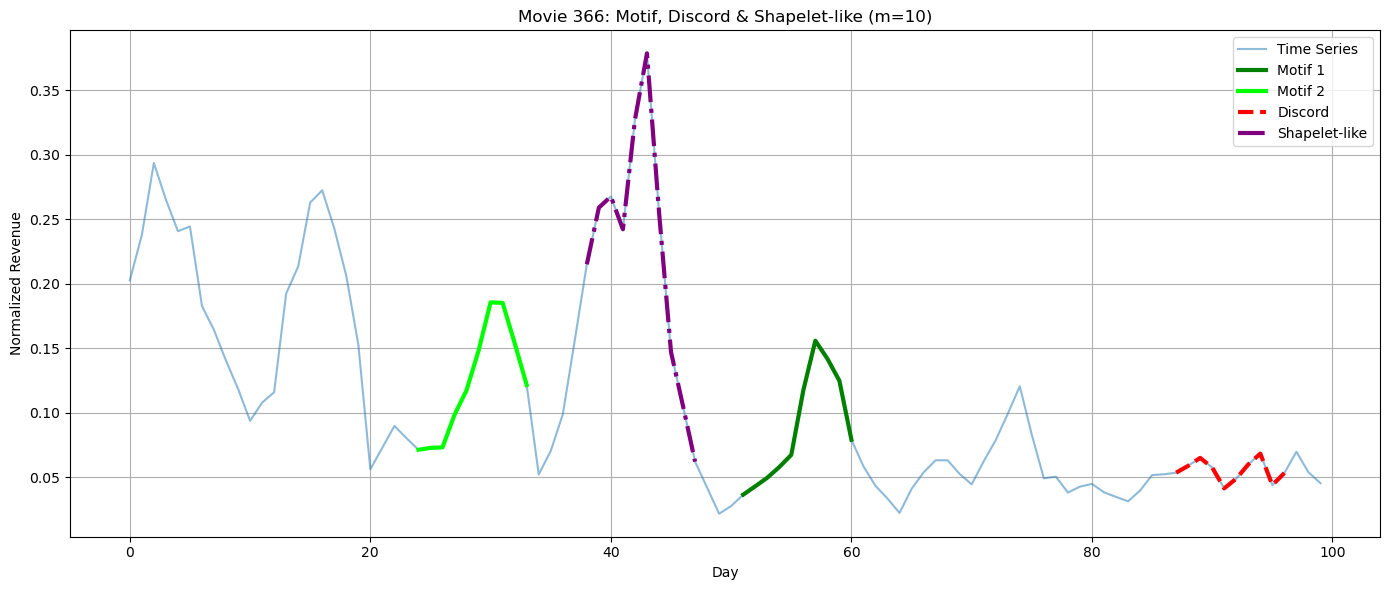

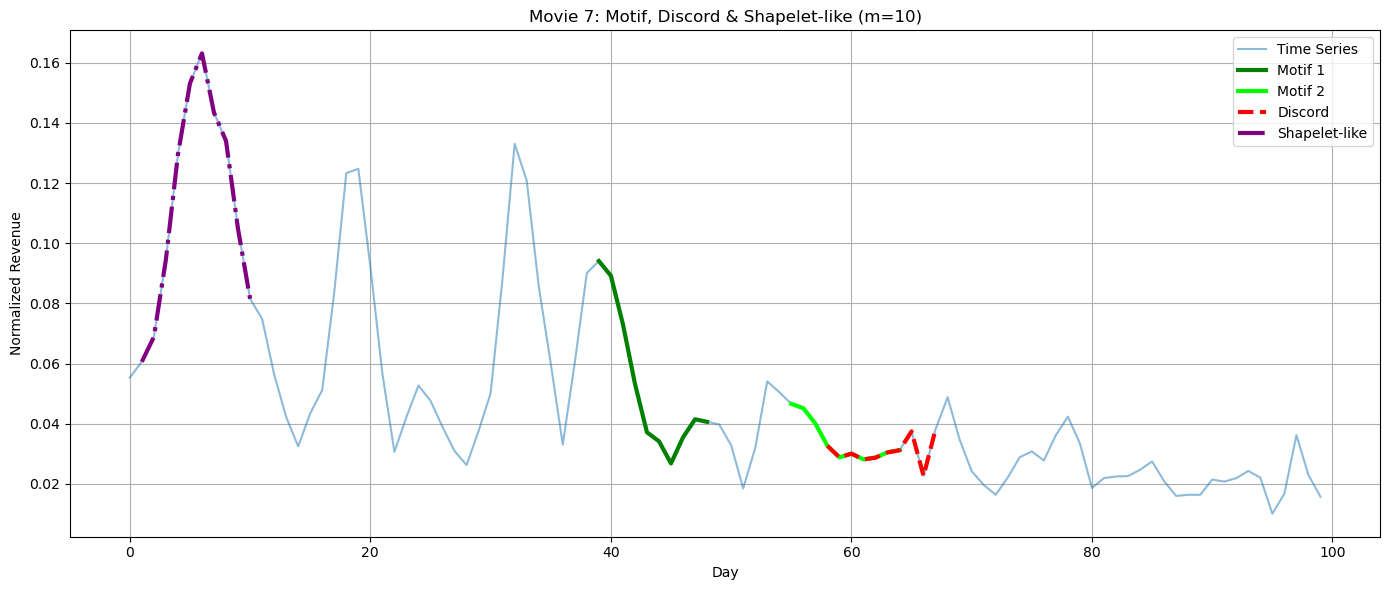

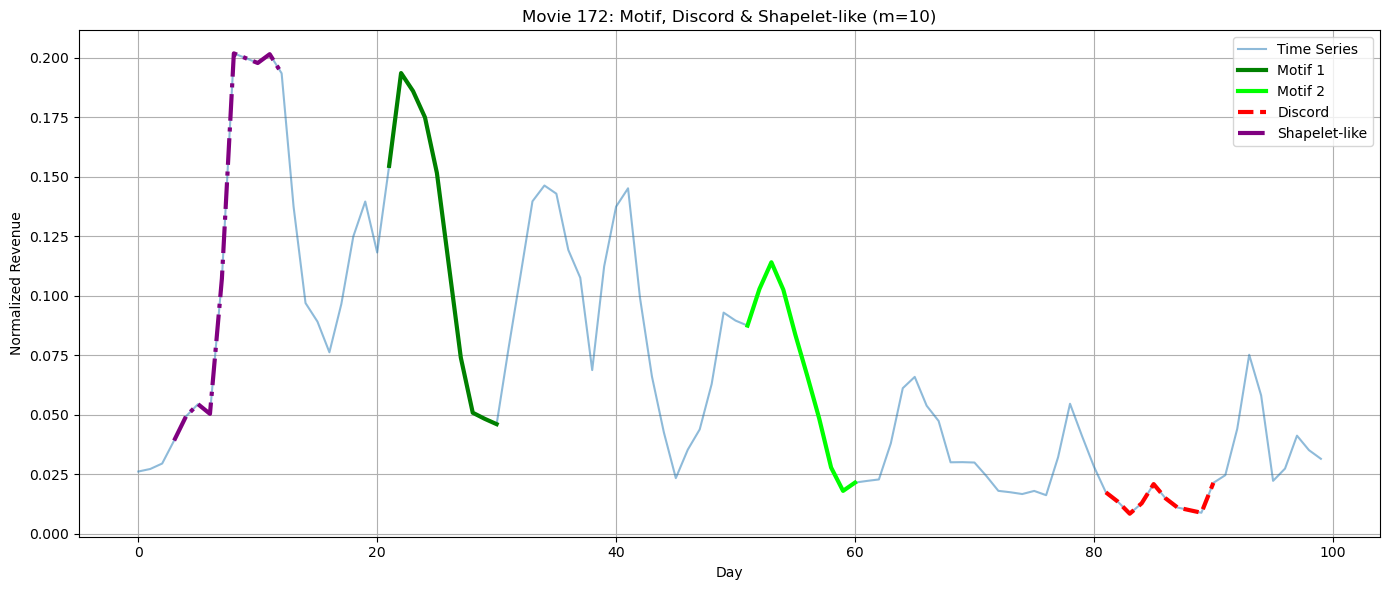

In [54]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 10  # subsequence length
top_n = 5  # numri i time series që do vizualizojmë
top_idxs = discord_df_sorted.head(top_n)['movie_idx'].values

for i in top_idxs:
    # Extract time series
    ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')
    mp = stumpy.stump(ts, m)

    # Motif pair
    motif_idx = np.argsort(mp[:, 0])[0]
    motif_pair_idx = int(mp[motif_idx, 1])

    # Discord
    discord_idx = np.argmax(mp[:, 0])

    # Shapelet-like subsequence (e.g., peak-based)
    shapelet_start = np.argmax(ts)
    shapelet_start = max(0, min(shapelet_start - m // 2, len(ts) - m))
    shapelet_segment = ts[shapelet_start:shapelet_start + m]

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(ts, label='Time Series', alpha=0.5)

    # Motif 1 & 2
    plt.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m],
             color='green', linewidth=3, label='Motif 1')
    plt.plot(np.arange(motif_pair_idx, motif_pair_idx + m), ts[motif_pair_idx:motif_pair_idx + m],
             color='lime', linewidth=3, label='Motif 2')

    # Discord
    plt.plot(np.arange(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m],
             color='red', linestyle='--', linewidth=3, label='Discord')

    # Shapelet-like
    plt.plot(np.arange(shapelet_start, shapelet_start + m), shapelet_segment,
             color='purple', linestyle='-.', linewidth=3, label='Shapelet-like')

    # Final formatting
    plt.title(f'Movie {i}: Motif, Discord & Shapelet-like (m={m})')
    plt.xlabel('Day')
    plt.ylabel('Normalized Revenue')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


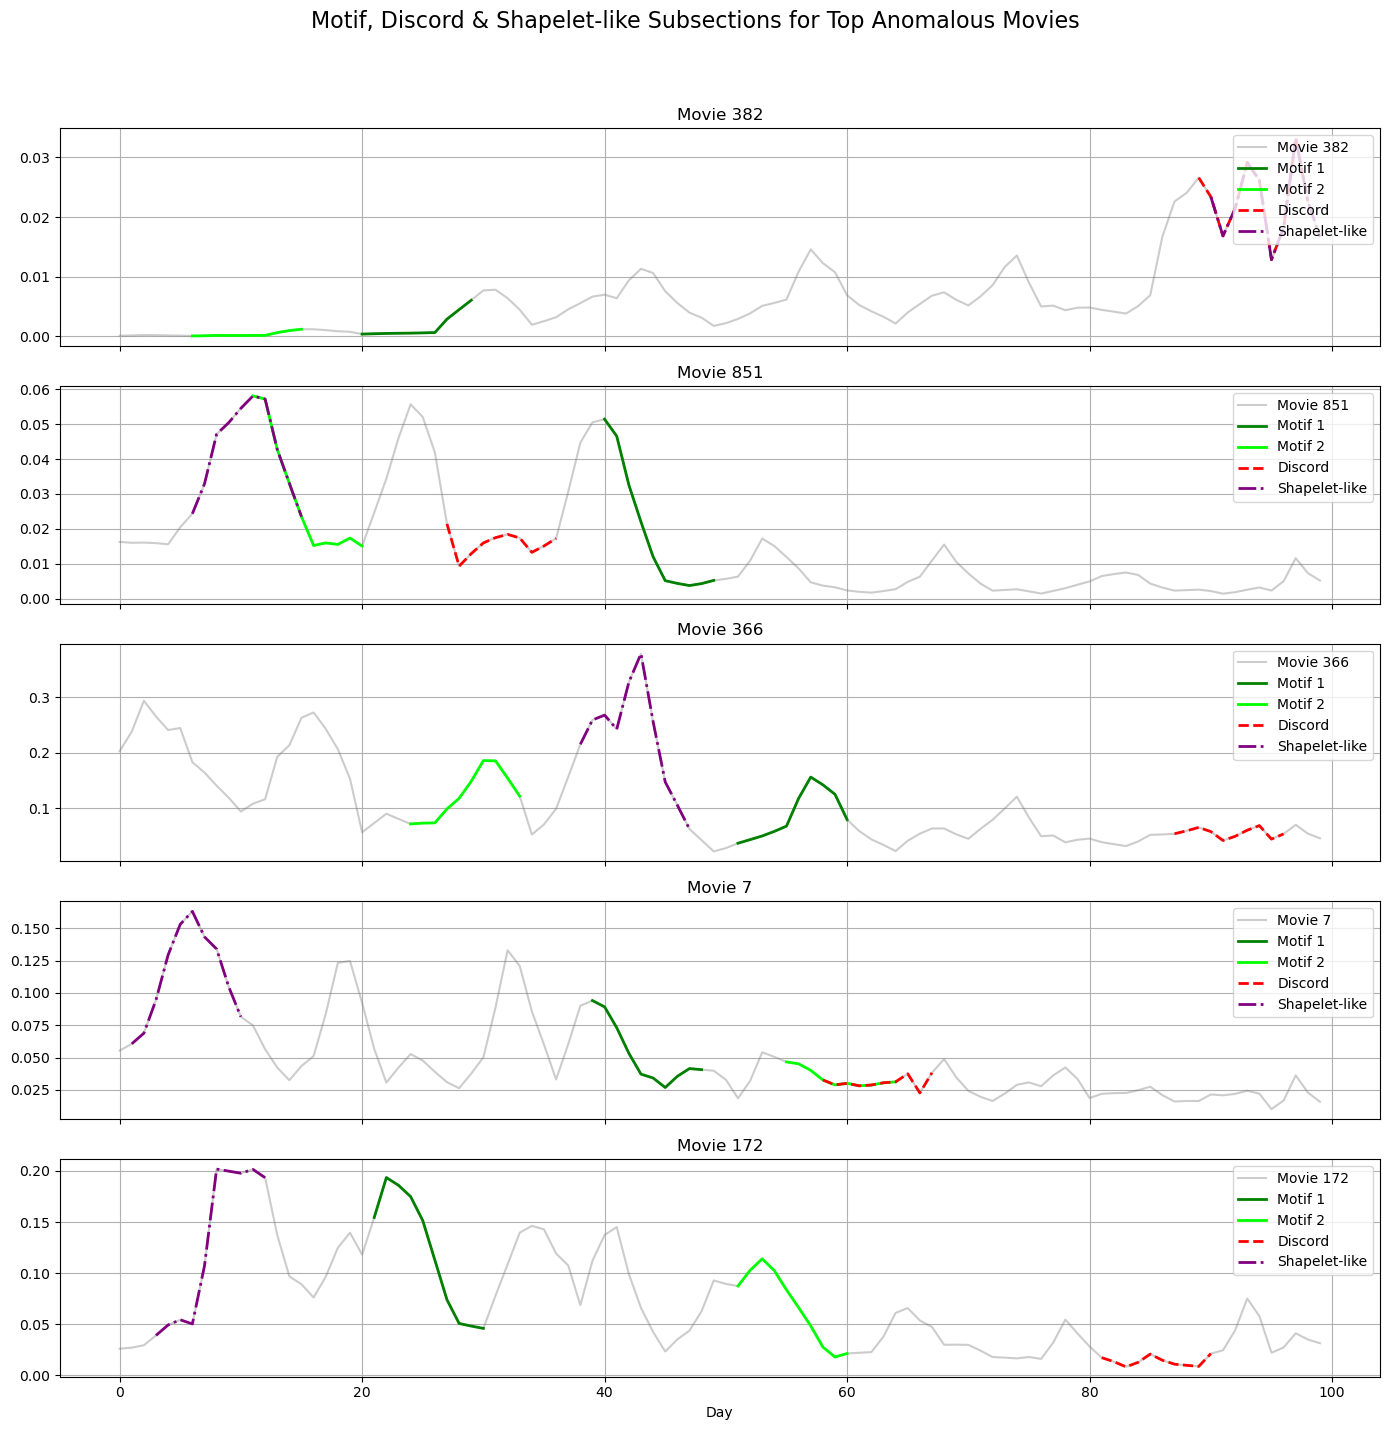

In [55]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 10  # subsequence length
top_n = 5  # how many time series to visualize
top_idxs = discord_df_sorted.head(top_n)['movie_idx'].values

# Setup subplots
fig, axs = plt.subplots(top_n, 1, figsize=(14, 3 * top_n), sharex=True)

if top_n == 1:
    axs = [axs]  # Ensure it's iterable

for ax, i in zip(axs, top_idxs):
    ts = df_scaled.loc[i, [str(j) for j in range(100)]].values.astype('float64')
    mp = stumpy.stump(ts, m)

    # Motif pair
    motif_idx = np.argsort(mp[:, 0])[0]
    motif_pair_idx = int(mp[motif_idx, 1])

    # Discord
    discord_idx = np.argmax(mp[:, 0])

    # Shapelet-like: peak-based
    shapelet_start = np.argmax(ts)
    shapelet_start = max(0, min(shapelet_start - m // 2, len(ts) - m))
    shapelet_segment = ts[shapelet_start:shapelet_start + m]

    # Plot full time series
    ax.plot(ts, label=f'Movie {i}', alpha=0.4, color='gray')

    # Motif 1 & 2
    ax.plot(np.arange(motif_idx, motif_idx + m), ts[motif_idx:motif_idx + m], color='green', linewidth=2, label='Motif 1')
    ax.plot(np.arange(motif_pair_idx, motif_pair_idx + m), ts[motif_pair_idx:motif_pair_idx + m], color='lime', linewidth=2, label='Motif 2')

    # Discord
    ax.plot(np.arange(discord_idx, discord_idx + m), ts[discord_idx:discord_idx + m], color='red', linestyle='--', linewidth=2, label='Discord')

    # Shapelet-like
    ax.plot(np.arange(shapelet_start, shapelet_start + m), shapelet_segment, color='purple', linestyle='-.', linewidth=2, label='Shapelet-like')

    # Formatting
    ax.set_title(f'Movie {i}')
    ax.grid(True)
    ax.legend(loc='upper right')

# Common x and y labels
fig.suptitle('Motif, Discord & Shapelet-like Subsections for Top Anomalous Movies', fontsize=16)
plt.xlabel('Day')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [56]:
##Klustering

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Vetëm pjesa me time series (100 ditë)
X = df_scaled[[str(i) for i in range(100)]].values

# (Opsionale) Normalizim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Silhouette score (opsional)
score = silhouette_score(X_scaled, labels)
print(f'Silhouette (Euclidean): {score:.3f}')


Silhouette (Euclidean): 0.757


In [58]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'k={k}, Silhouette Score = {score:.3f}')


k=2, Silhouette Score = 0.757
k=3, Silhouette Score = 0.590
k=4, Silhouette Score = 0.524
k=5, Silhouette Score = 0.527
k=6, Silhouette Score = 0.476
k=7, Silhouette Score = 0.477
k=8, Silhouette Score = 0.402
k=9, Silhouette Score = 0.372


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


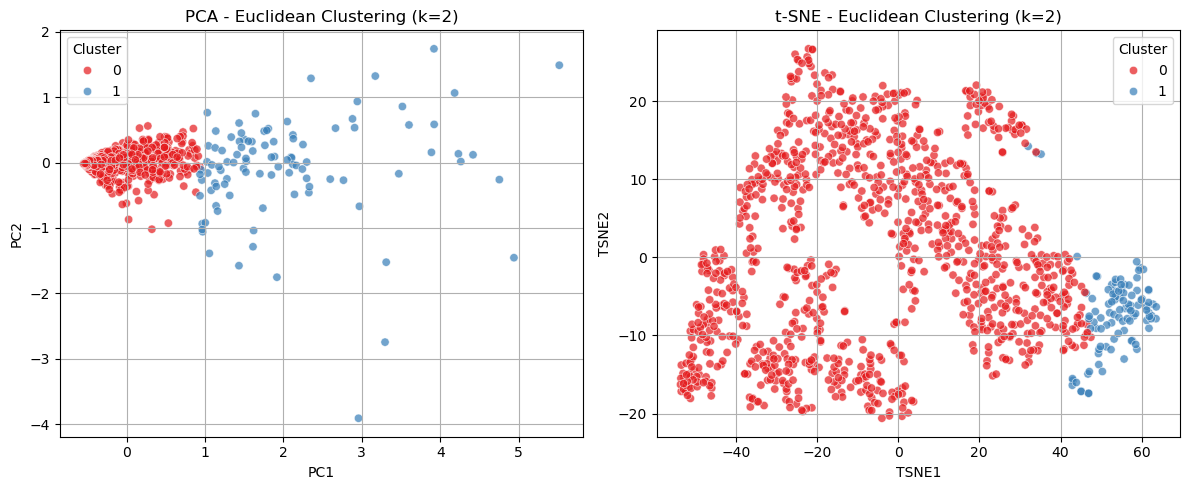

In [59]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Time series only
X = df_scaled[[str(i) for i in range(100)]].values

# Clustering me k=2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Shto cluster labels për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels

# Vizualizim PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('PCA - Euclidean Clustering (k=2)')
plt.grid(True)

# Vizualizim t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE - Euclidean Clustering (k=2)')
plt.grid(True)

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


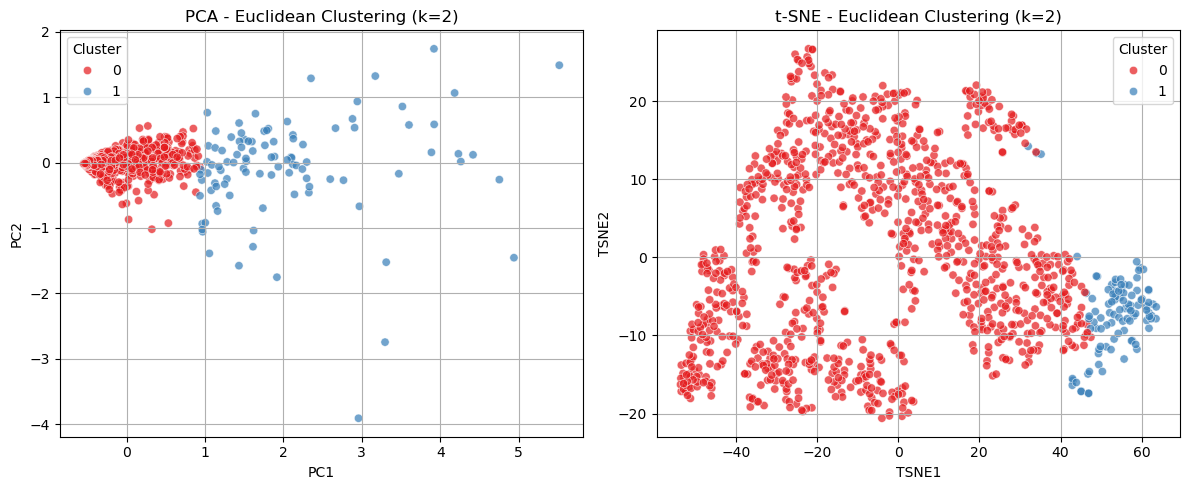

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Time series only
X = df_scaled[[str(i) for i in range(100)]].values

# Clustering me k=2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Shto cluster labels për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels

# Vizualizim PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('PCA - Euclidean Clustering (k=2)')
plt.grid(True)

# Vizualizim t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('t-SNE - Euclidean Clustering (k=2)')
plt.grid(True)

plt.tight_layout()
plt.show()


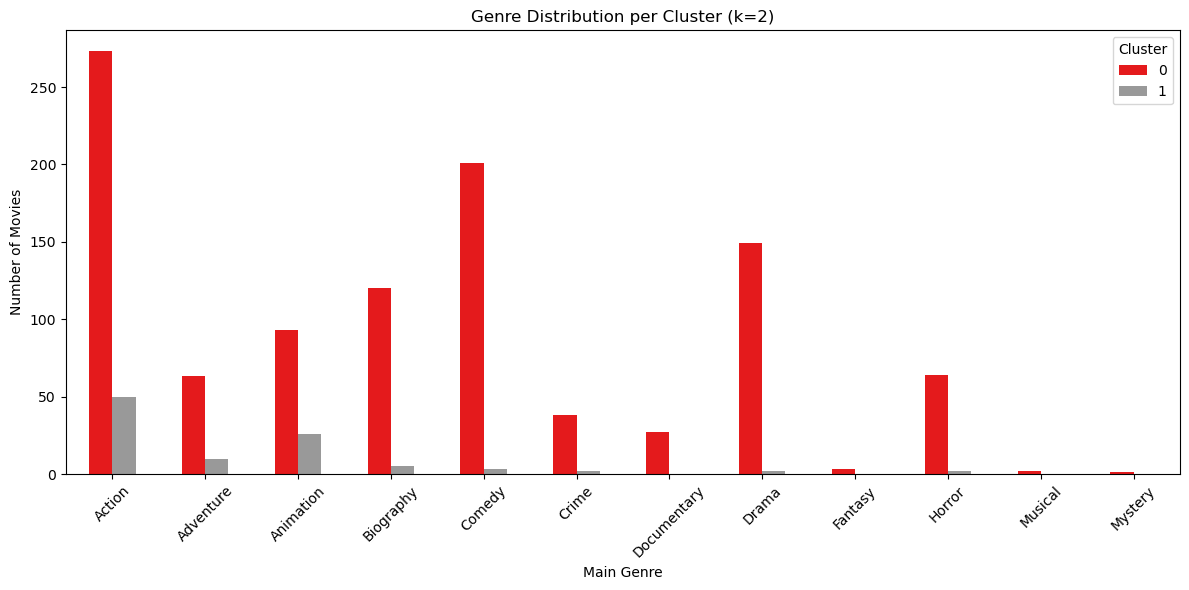

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Shto cluster labels në df_scaled
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = labels
df_clustered['main_genre'] = df_ts['main_genre'].values  # sigurohu që renditja e indeksit përputhet

# Numëro zhanret për çdo cluster
genre_counts = df_clustered.groupby(['Cluster', 'main_genre']).size().reset_index(name='count')

# Kthe ne pivot për vizualizim më të lehtë
pivot = genre_counts.pivot(index='main_genre', columns='Cluster', values='count').fillna(0)

# Vizato
pivot.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title("Genre Distribution per Cluster (k=2)")
plt.xlabel("Main Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


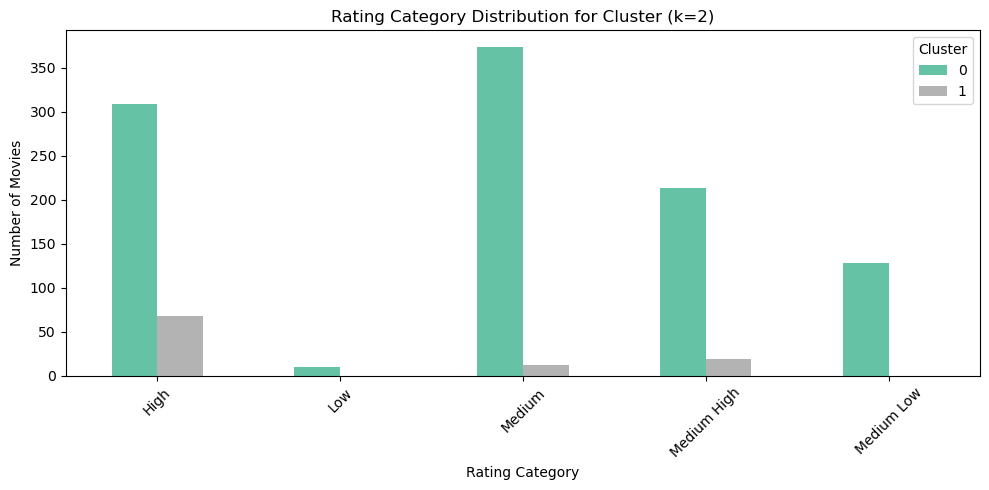

In [62]:
# Shto cluster labels dhe kategori vlerësimi
df_clustered['rating_category'] = df_ts['rating_category'].values  # sigurohu që renditja është korrekte

# Numëro për çdo cluster dhe kategori
rating_counts = df_clustered.groupby(['Cluster', 'rating_category']).size().reset_index(name='count')

# Pivot për grafik
pivot_rating = rating_counts.pivot(index='rating_category', columns='Cluster', values='count').fillna(0)

# Vizato
pivot_rating.plot(kind='bar', figsize=(10, 5), colormap='Set2')
plt.title("Rating Category Distribution for Cluster (k=2)")
plt.xlabel("Rating Category")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [63]:
## with dtw

In [64]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Prepare time series for DTW (reshaped to 3D)
X_dtw = df_scaled[[str(i) for i in range(100)]].values
X_dtw = X_dtw.reshape((X_dtw.shape[0], X_dtw.shape[1], 1))
X_dtw = TimeSeriesScalerMeanVariance().fit_transform(X_dtw)

# DTW clustering
dtw_model = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42)
labels_dtw = dtw_model.fit_predict(X_dtw)


In [65]:
df_dtw = df_scaled.copy()
df_dtw['Cluster_DTW'] = labels_dtw
df_dtw['main_genre'] = df_ts['main_genre'].values
df_dtw['rating_category'] = df_ts['rating_category'].values  # ose krijoje me pd.cut nëse s’është gati


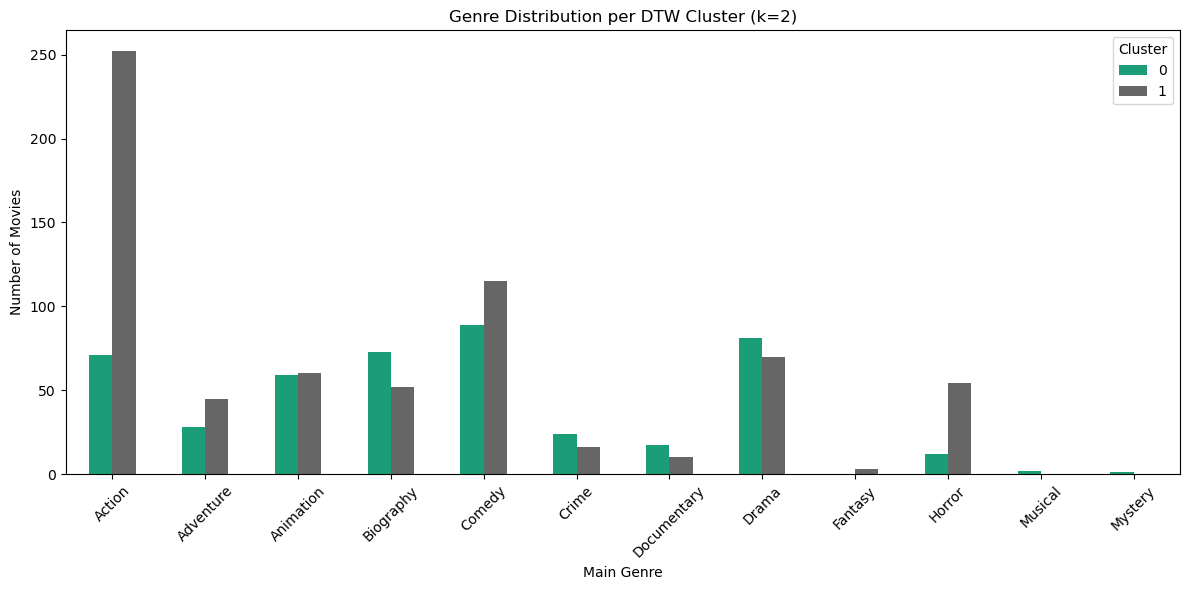

In [66]:
genre_counts_dtw = df_dtw.groupby(['Cluster_DTW', 'main_genre']).size().reset_index(name='count')
pivot_genre_dtw = genre_counts_dtw.pivot(index='main_genre', columns='Cluster_DTW', values='count').fillna(0)

pivot_genre_dtw.plot(kind='bar', figsize=(12, 6), colormap='Dark2')
plt.title("Genre Distribution per DTW Cluster (k=2)")
plt.xlabel("Main Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


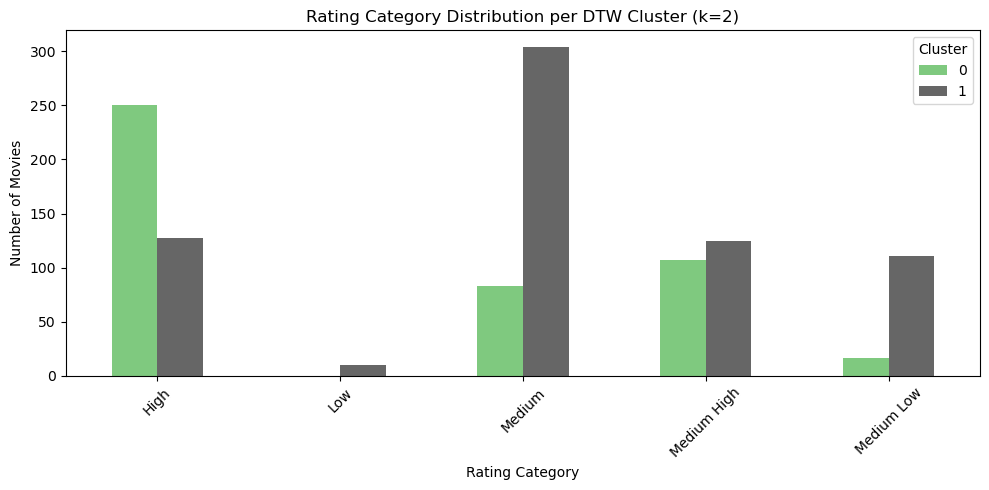

In [68]:
rating_counts_dtw = df_dtw.groupby(['Cluster_DTW', 'rating_category']).size().reset_index(name='count')
pivot_rating_dtw = rating_counts_dtw.pivot(index='rating_category', columns='Cluster_DTW', values='count').fillna(0)

pivot_rating_dtw.plot(kind='bar', figsize=(10, 5), colormap='Accent')
plt.title("Rating Category Distribution per DTW Cluster (k=2)")
plt.xlabel("Rating Category")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


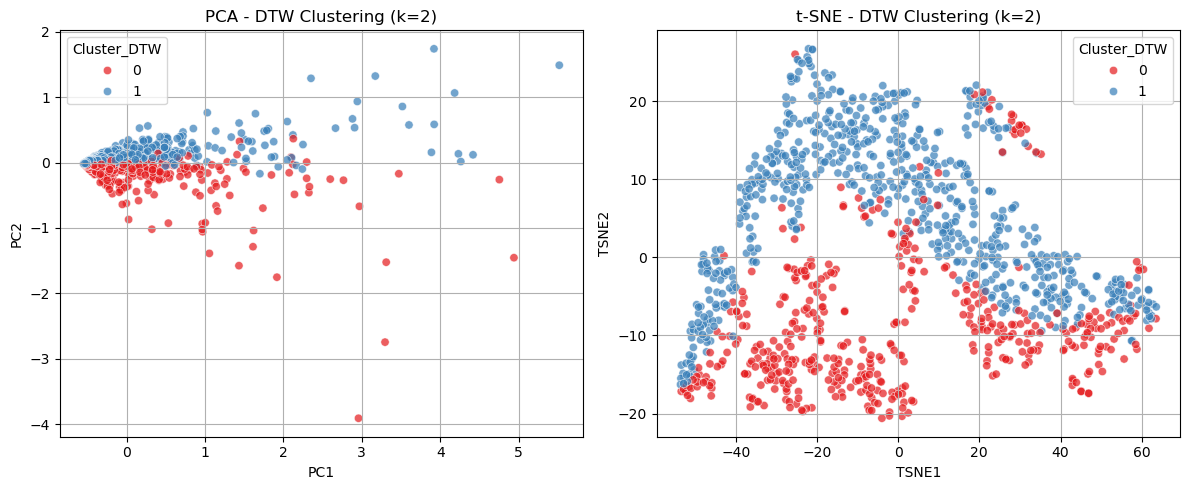

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Përdor të dhënat origjinale në 2D për PCA & t-SNE (jo ato të reshaped për DTW)
X_flat = df_scaled[[str(i) for i in range(100)]].values

# PCA
pca_dtw = PCA(n_components=2)
X_pca_dtw = pca_dtw.fit_transform(X_flat)

# t-SNE
tsne_dtw = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_dtw = tsne_dtw.fit_transform(X_flat)

# Shto etiketat e clusterëve për DTW
pca_df = pd.DataFrame(X_pca_dtw, columns=['PC1', 'PC2'])
pca_df['Cluster_DTW'] = labels_dtw

tsne_df = pd.DataFrame(X_tsne_dtw, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster_DTW'] = labels_dtw

# Vizualizimi
plt.figure(figsize=(12, 5))

# PCA
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_DTW', palette='Set1', alpha=0.7)
plt.title('PCA - DTW Clustering (k=2)')
plt.grid(True)

# t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster_DTW', palette='Set1', alpha=0.7)
plt.title('t-SNE - DTW Clustering (k=2)')
plt.grid(True)

plt.tight_layout()
plt.show()


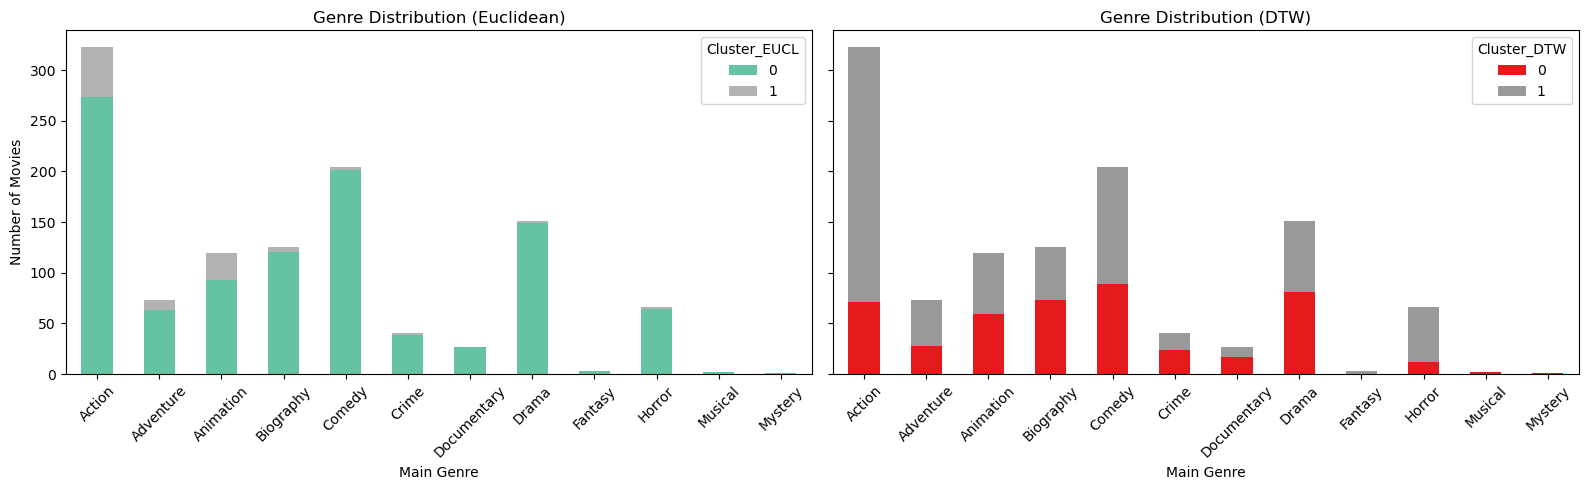

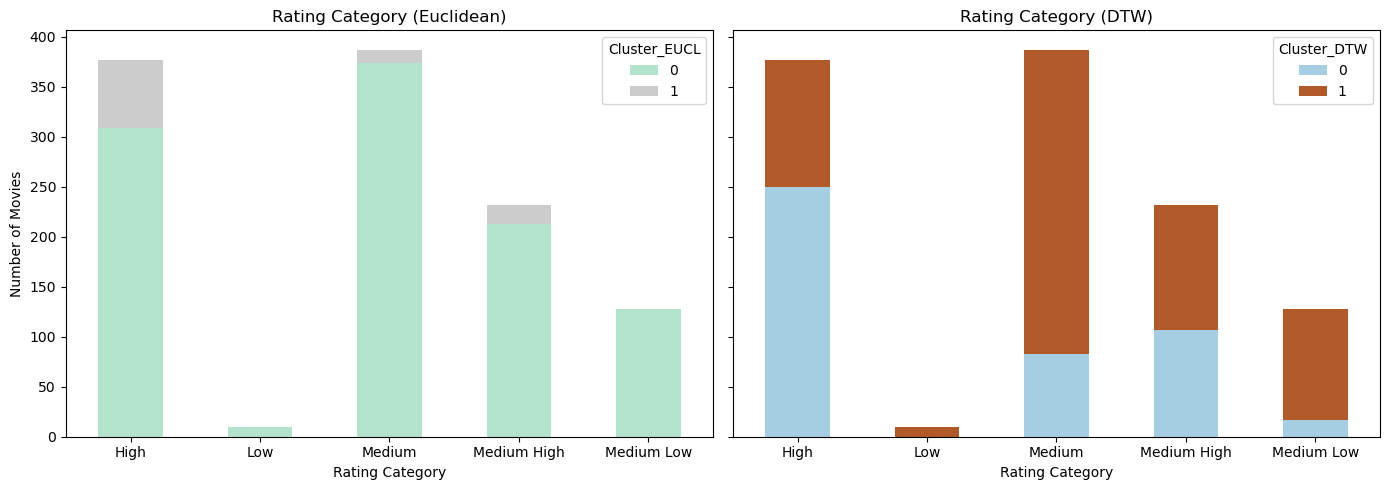

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Kombino të dhënat
df_compare = df_scaled.copy()
df_compare['Cluster_EUCL'] = labels
df_compare['Cluster_DTW'] = labels_dtw
df_compare['main_genre'] = df_ts['main_genre'].values
df_compare['rating_category'] = df_ts['rating_category'].values

# ===========================
# Genre comparison
# ===========================
genre_eucl = df_compare.groupby(['Cluster_EUCL', 'main_genre']).size().unstack(fill_value=0)
genre_dtw = df_compare.groupby(['Cluster_DTW', 'main_genre']).size().unstack(fill_value=0)

# Plot genre distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
genre_eucl.T.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set2', title='Genre Distribution (Euclidean)')
genre_dtw.T.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set1', title='Genre Distribution (DTW)')
axes[0].set_ylabel("Number of Movies")
for ax in axes:
    ax.set_xlabel("Main Genre")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# ===========================
# Rating category comparison
# ===========================
rating_eucl = df_compare.groupby(['Cluster_EUCL', 'rating_category']).size().unstack(fill_value=0)
rating_dtw = df_compare.groupby(['Cluster_DTW', 'rating_category']).size().unstack(fill_value=0)

# Plot rating distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
rating_eucl.T.plot(kind='bar', stacked=True, ax=axes[0], colormap='Pastel2', title='Rating Category (Euclidean)')
rating_dtw.T.plot(kind='bar', stacked=True, ax=axes[1], colormap='Paired', title='Rating Category (DTW)')
axes[0].set_ylabel("Number of Movies")
for ax in axes:
    ax.set_xlabel("Rating Category")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


In [71]:
# Filmat që janë në një cluster në Euclidean dhe tjetri në DTW
mismatch = df_compare[df_compare['Cluster_EUCL'] != df_compare['Cluster_DTW']]

# Sa janë gjithsej?
print(f"Number of movies that changed cluster: {len(mismatch)}")

# Shiko disa nga ata:
mismatch[['Cluster_EUCL', 'Cluster_DTW', 'main_genre', 'rating_category']].head(10)


Number of movies that changed cluster: 677


Cluster_EUCL  Cluster_DTW main_genre rating_category
4              0            1  Adventure            High
7              0            1     Action            High
8              0            1     Action     Medium High
9              0            1     Action     Medium High
10             1            0     Action            High
11             0            1     Action            High
12             0            1     Action            High
14             0            1     Action          Medium
15             0            1      Drama     Medium High
16             0            1  Animation     Medium High

In [72]:
## gerachical

In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Të dhënat e time series
X = df_scaled[[str(i) for i in range(100)]].values

# Clustering hierarkik me linkage='ward' dhe metric='euclidean'
agg_model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels_hier = agg_model.fit_predict(X)

# Ruaj në dataframe
df_scaled['Cluster_HIER'] = labels_hier


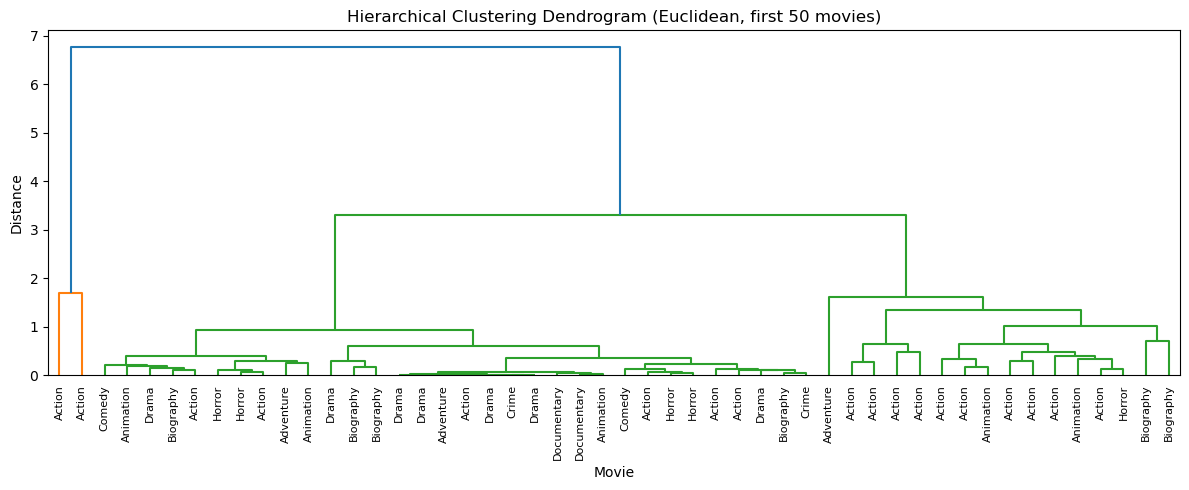

In [74]:
# Dendrogram me linkage matrix (për 50 filma për shembull)
link_matrix = linkage(X[:50], method='ward', metric='euclidean')

plt.figure(figsize=(12, 5))
dendrogram(link_matrix, labels=df_ts['main_genre'].values[:50], leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Euclidean, first 50 movies)")
plt.xlabel("Movie")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_1347/1990174286.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix_dtw = linkage(distance_matrix, method='average')


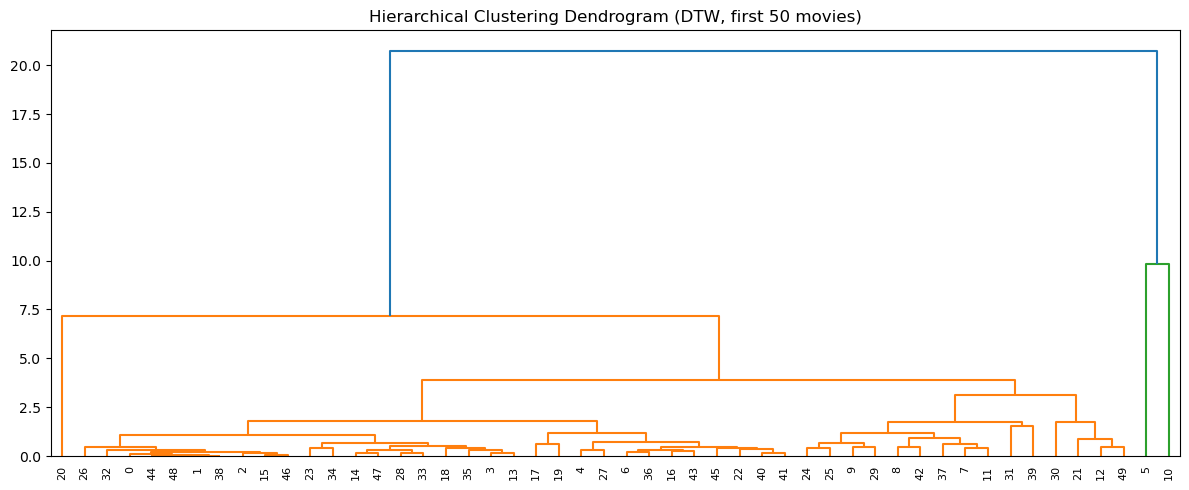

In [75]:
from tslearn.metrics import cdist_dtw

X_dtw = df_scaled[[str(i) for i in range(100)]].values
distance_matrix = cdist_dtw(X_dtw[:50])  # për shembull 50 filma

link_matrix_dtw = linkage(distance_matrix, method='average')

plt.figure(figsize=(12, 5))
dendrogram(link_matrix_dtw)
plt.title("Hierarchical Clustering Dendrogram (DTW, first 50 movies)")
plt.tight_layout()
plt.show()


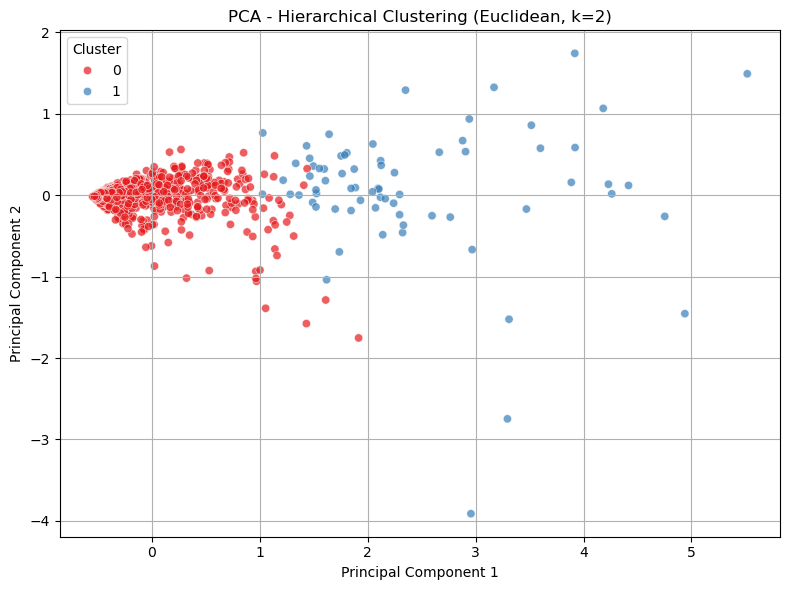

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Time series data (0–99 ditë)
X = df_scaled[[str(i) for i in range(100)]].values

# 2. PCA me 2 komponentë
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. DataFrame për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster_HIER'] = df_scaled['Cluster_HIER'].values

# 4. Vizualizim
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_HIER', palette='Set1', alpha=0.7)
plt.title('PCA - Hierarchical Clustering (Euclidean, k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


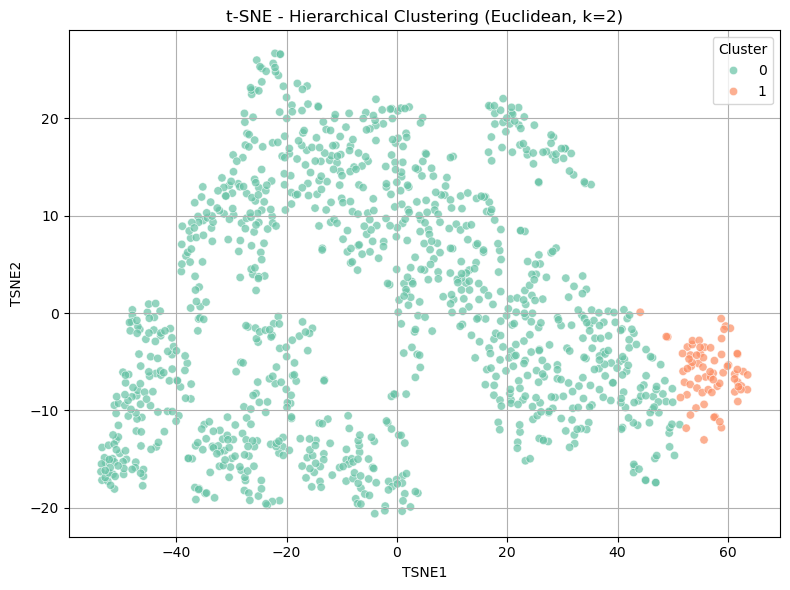

In [77]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Të dhënat e time series (0–99)
X = df_scaled[[str(i) for i in range(100)]].values

# 2. t-SNE reduktim në 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# 3. DataFrame për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster_HIER'] = df_scaled['Cluster_HIER'].values

# 4. Vizualizim
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster_HIER', palette='Set2', alpha=0.7)
plt.title('t-SNE - Hierarchical Clustering (Euclidean, k=2)')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_1347/102806553.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix = linkage(distance_matrix, method='average')
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


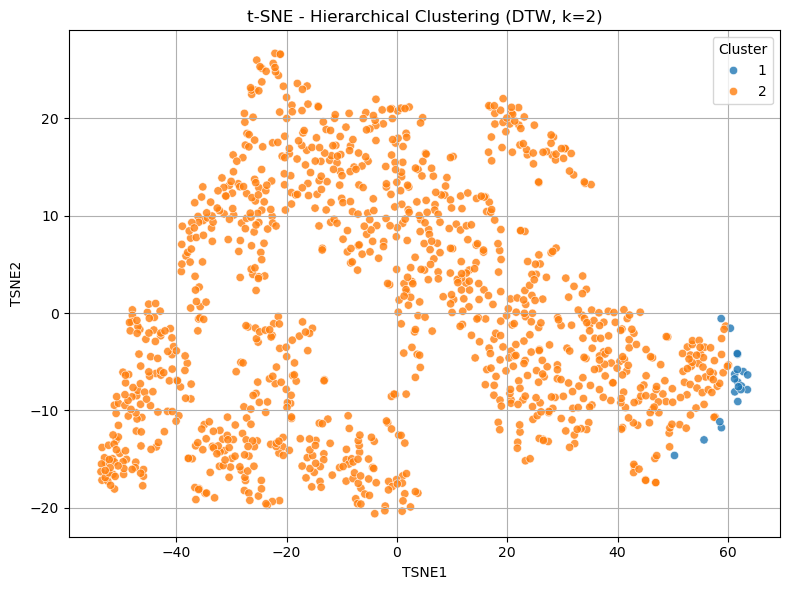

In [78]:
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Përgatit të dhënat
X_dtw = df_scaled[[str(i) for i in range(100)]].values
X_dtw = X_dtw.astype('float64')

# 2. Llogarit DTW distance matrix (konsidero përdorim në subset nëse është shumë e madhe)
distance_matrix = cdist_dtw(X_dtw)

# 3. Hierarchical clustering me linkage matrix nga distancat DTW
link_matrix = linkage(distance_matrix, method='average')

# 4. Merr labels për k=2 clusterë
labels_hier_dtw = fcluster(link_matrix, t=2, criterion='maxclust')

# 5. t-SNE mbi X (original time series, jo distance matrix)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_dtw)

# 6. DataFrame për vizualizim
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster_HIER_DTW'] = labels_hier_dtw

# 7. Vizualizim
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster_HIER_DTW', palette='tab10', alpha=0.8)
plt.title('t-SNE - Hierarchical Clustering (DTW, k=2)')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


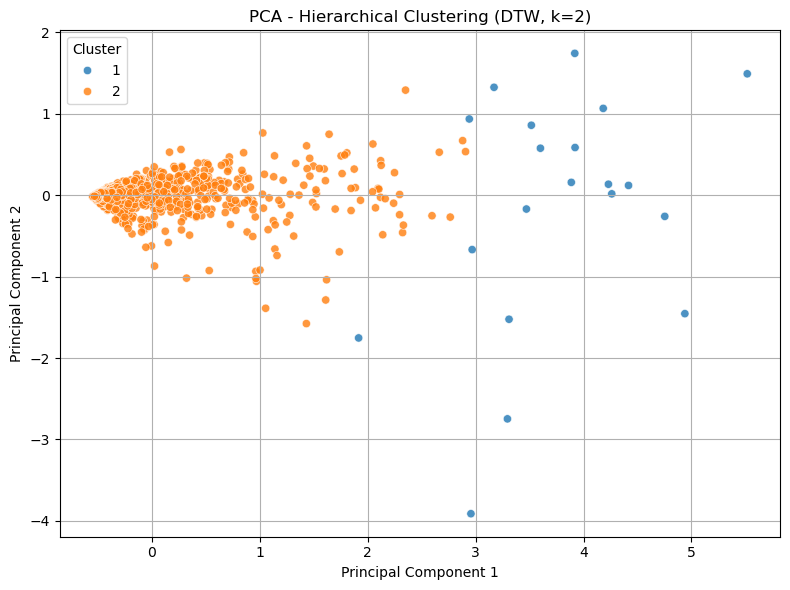

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Të dhënat origjinale
X = df_scaled[[str(i) for i in range(100)]].values

# 2. PCA në 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. DataFrame për vizualizim
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster_HIER_DTW'] = labels_hier_dtw

# 4. Vizualizim
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_HIER_DTW', palette='tab10', alpha=0.8)
plt.title('PCA - Hierarchical Clustering (DTW, k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [96]:
import pandas as pd

# Shto të gjitha labels në një dataframe
df_compare_hier = df_scaled.copy()
df_compare_hier['main_genre'] = df_ts['main_genre'].values
df_compare_hier['rating_category'] = df_ts['rating_category'].values
df_compare_hier['Cluster_HIER_DTW'] = labels_hier_dtw  # nga linkage+fcluster

# Tabela: Genre për Cluster_HIER (Euclidean)
genre_hier_eucl = df_compare_hier.groupby(['Cluster_HIER', 'main_genre']).size().unstack(fill_value=0)
genre_hier_eucl.index.name = 'Cluster_HIER'

# Tabela: Rating për Cluster_HIER (Euclidean)
rating_hier_eucl = df_compare_hier.groupby(['Cluster_HIER', 'rating_category']).size().unstack(fill_value=0)
rating_hier_eucl.index.name = 'Cluster_HIER'

# Tabela: Genre për Cluster_HIER_DTW
genre_hier_dtw = df_compare_hier.groupby(['Cluster_HIER_DTW', 'main_genre']).size().unstack(fill_value=0)
genre_hier_dtw.index.name = 'Cluster_HIER_DTW'

# Tabela: Rating për Cluster_HIER_DTW
rating_hier_dtw = df_compare_hier.groupby(['Cluster_HIER_DTW', 'rating_category']).size().unstack(fill_value=0)
rating_hier_dtw.index.name = 'Cluster_HIER_DTW'

# Shfaq rezultatet si tabela krahasimi
import IPython.display as disp
disp.display(genre_hier_eucl.style.set_caption("Genre Distribution - Hierarchical Clustering (Euclidean)"))
disp.display(rating_hier_eucl.style.set_caption("Rating Distribution - Hierarchical Clustering (Euclidean)"))
disp.display(genre_hier_dtw.style.set_caption("Genre Distribution - Hierarchical Clustering (DTW)"))
disp.display(rating_hier_dtw.style.set_caption("Rating Distribution - Hierarchical Clustering (DTW)"))


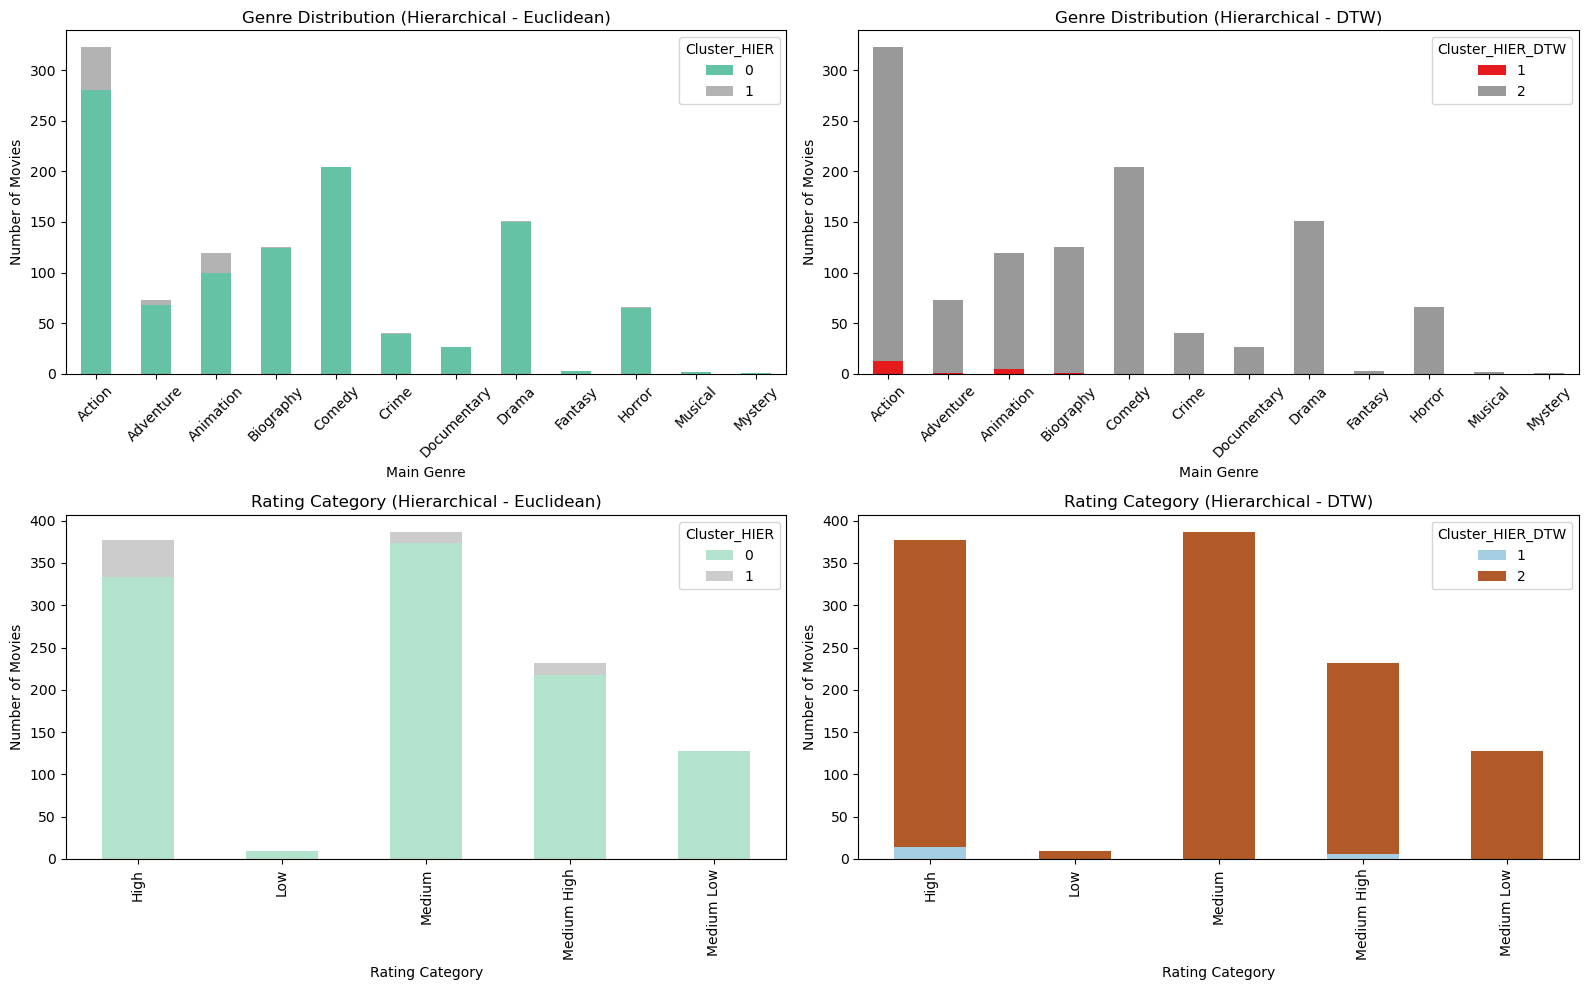

In [97]:
import matplotlib.pyplot as plt

# Genre - Euclidean HIER
genre_counts_hier = df_compare_hier.groupby(['Cluster_HIER', 'main_genre']).size().reset_index(name='count')
pivot_genre_hier = genre_counts_hier.pivot(index='main_genre', columns='Cluster_HIER', values='count').fillna(0)

# Genre - DTW HIER
genre_counts_hier_dtw = df_compare_hier.groupby(['Cluster_HIER_DTW', 'main_genre']).size().reset_index(name='count')
pivot_genre_hier_dtw = genre_counts_hier_dtw.pivot(index='main_genre', columns='Cluster_HIER_DTW', values='count').fillna(0)

# Rating - Euclidean HIER
rating_counts_hier = df_compare_hier.groupby(['Cluster_HIER', 'rating_category']).size().reset_index(name='count')
pivot_rating_hier = rating_counts_hier.pivot(index='rating_category', columns='Cluster_HIER', values='count').fillna(0)

# Rating - DTW HIER
rating_counts_hier_dtw = df_compare_hier.groupby(['Cluster_HIER_DTW', 'rating_category']).size().reset_index(name='count')
pivot_rating_hier_dtw = rating_counts_hier_dtw.pivot(index='rating_category', columns='Cluster_HIER_DTW', values='count').fillna(0)

# ============ Visualization ============

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)

# Genre - Euclidean
pivot_genre_hier.plot(kind='bar', stacked=True, ax=axes[0,0], colormap='Set2', title='Genre Distribution (Hierarchical - Euclidean)')
axes[0,0].set_ylabel("Number of Movies")
axes[0,0].set_xlabel("Main Genre")
axes[0,0].tick_params(axis='x', rotation=45)

# Genre - DTW
pivot_genre_hier_dtw.plot(kind='bar', stacked=True, ax=axes[0,1], colormap='Set1', title='Genre Distribution (Hierarchical - DTW)')
axes[0,1].set_ylabel("Number of Movies")
axes[0,1].set_xlabel("Main Genre")
axes[0,1].tick_params(axis='x', rotation=45)

# Rating - Euclidean
pivot_rating_hier.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='Pastel2', title='Rating Category (Hierarchical - Euclidean)')
axes[1,0].set_ylabel("Number of Movies")
axes[1,0].set_xlabel("Rating Category")

# Rating - DTW
pivot_rating_hier_dtw.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Paired', title='Rating Category (Hierarchical - DTW)')
axes[1,1].set_ylabel("Number of Movies")
axes[1,1].set_xlabel("Rating Category")

plt.tight_layout()
plt.show()


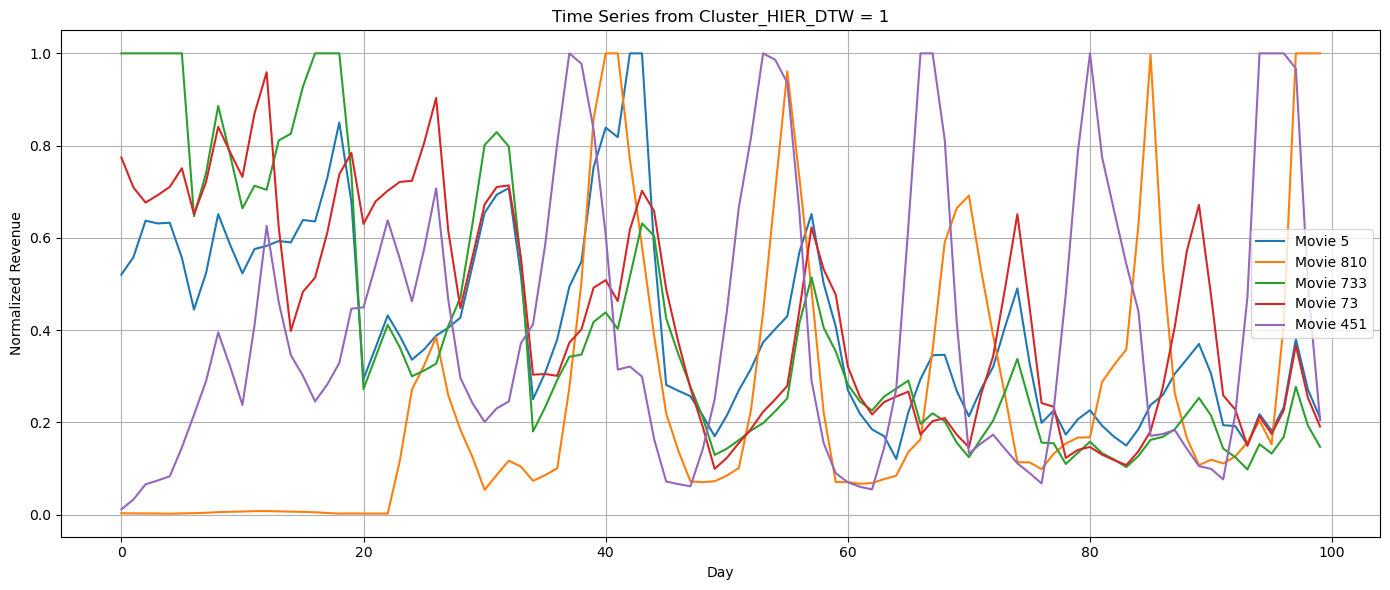

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrat
cluster_1_dtw = df_compare_hier[df_compare_hier['Cluster_HIER_DTW'] == 1]

# Zgjidh disa raste rastësisht (deri në 5)
sample_ts = cluster_1_dtw.sample(n=min(5, len(cluster_1_dtw)), random_state=42)

# Vizato çdo time series
plt.figure(figsize=(14, 6))
for i, idx in enumerate(sample_ts.index):
    ts = df_scaled.loc[idx, [str(j) for j in range(100)]].values
    plt.plot(ts, label=f'Movie {idx}')

plt.title('Time Series from Cluster_HIER_DTW = 1')
plt.xlabel('Day')
plt.ylabel('Normalized Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== Classification Report (KNN + Euclidean) ===
              precision    recall  f1-score   support

      Action       0.45      0.75      0.56        65
   Adventure       0.00      0.00      0.00        15
   Animation       0.62      0.21      0.31        24
   Biography       0.26      0.28      0.27        25
      Comedy       0.22      0.27      0.24        41
       Crime       0.25      0.12      0.17         8
 Documentary       1.00      0.20      0.33         5
       Drama       0.16      0.10      0.12        30
     Fantasy       0.00      0.00      0.00         1
      Horror       0.00      0.00      0.00        13
     Musical       0.00      0.00      0.00         0

    accuracy                           0.34       227
   macro avg       0.27      0.18      0.18       227
weighted avg       0.31      0.34      0.30       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

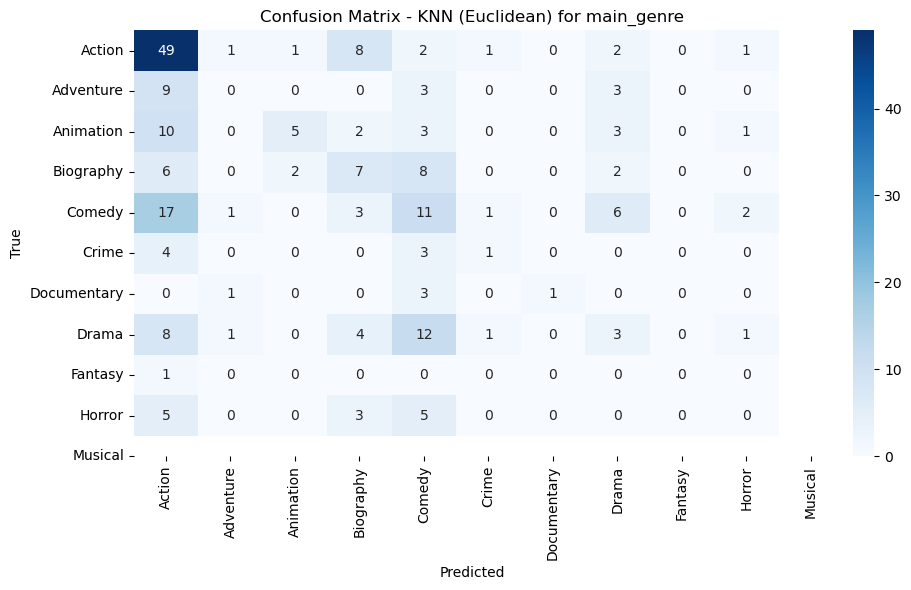

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Hiq zhanret me vetëm 1 film
genre_counts = df_ts['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

# 2. Përgatit të dhënat
X = df_scaled.loc[mask, [str(i) for i in range(100)]].values
y_raw = df_ts.loc[mask, 'main_genre'].values

# 3. Label encoding për targetin
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Standardizim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN me Euclidean (default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# 7. Raporti i klasifikimit
print("=== Classification Report (KNN + Euclidean) ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))
 
# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN (Euclidean) for main_genre")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


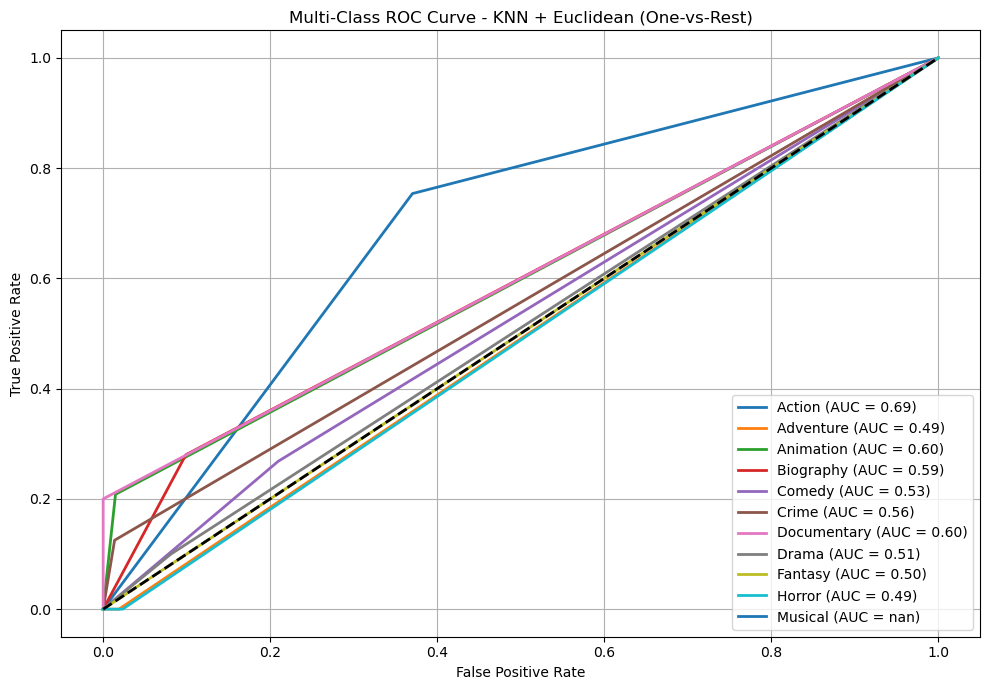

In [101]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 9. Binarizim për klasifikim multi-klasësh OvR
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# 10. ROC curve multi-class (OvR)
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - KNN + Euclidean (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


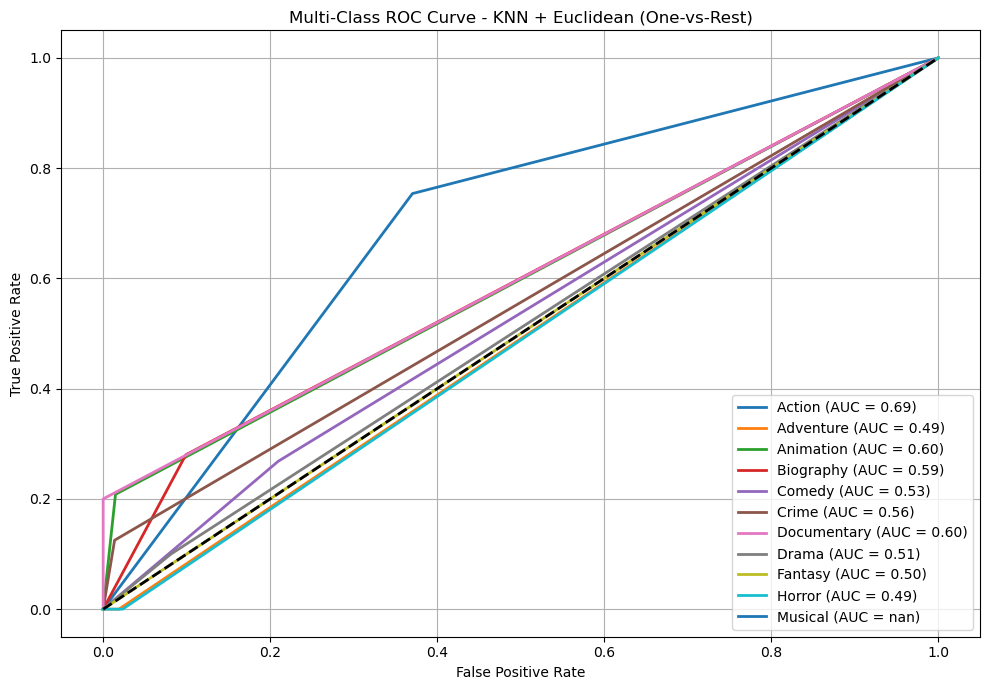

In [102]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 9. Binarizim për klasifikim multi-klasësh OvR
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# 10. ROC curve multi-class (OvR)
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - KNN + Euclidean (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Classification Report (KNN + DTW) ===
              precision    recall  f1-score   support

      Action       0.41      0.72      0.52        65
   Adventure       0.12      0.13      0.12        15
   Animation       0.33      0.17      0.22        24
   Biography       0.28      0.28      0.28        25
      Comedy       0.40      0.34      0.37        41
       Crime       0.00      0.00      0.00         8
 Documentary       0.50      0.20      0.29         5
       Drama       0.46      0.20      0.28        30
     Fantasy       0.00      0.00      0.00         1
      Horror       0.14      0.08      0.10        13
     Musical       0.00      0.00      0.00         0

    accuracy                           0.36       227
   macro avg       0.24      0.19      0.20       227
weighted avg       0.34      0.36      0.33       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

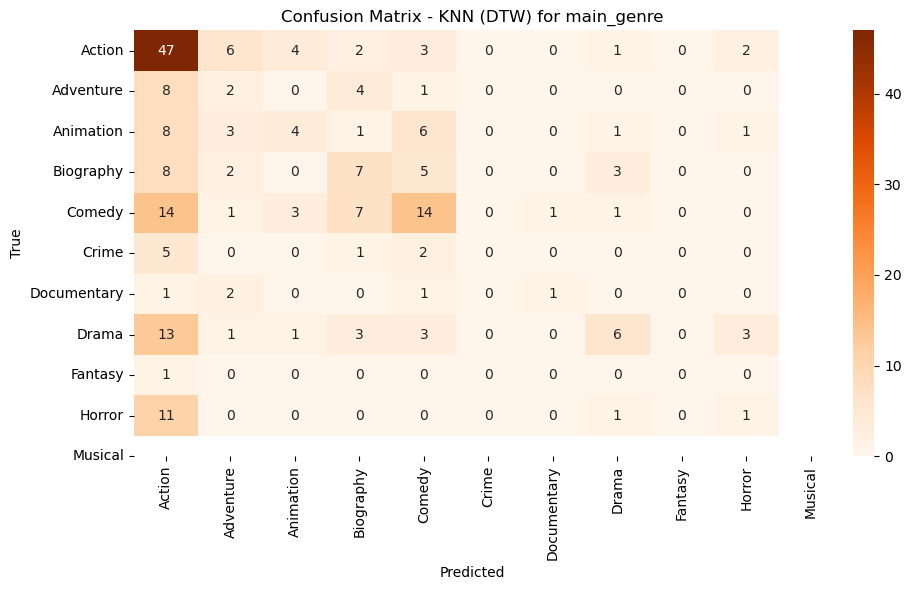

In [109]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Filtro target-at që ndodhen ≥ 2 herë
genre_counts = df_ts['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

# 2. Përgatit të dhënat në format 3D për DTW
X_raw = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype('float64')
X = X_raw.reshape((X_raw.shape[0], X_raw.shape[1], 1))  # (n_samples, n_timestamps, 1)
y_raw = df_ts.loc[mask, 'main_genre'].values

# 3. Kodim me LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 4. Normalizim (opsional)
from sklearn.model_selection import train_test_split
scaler = TimeSeriesScalerMinMax()
X_scaled = scaler.fit_transform(X)

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 6. KNN + DTW classifier
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train, y_train)
y_pred = knn_dtw.predict(X_test)

# 7. Report
print("=== Classification Report (KNN + DTW) ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))

# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN (DTW) for main_genre")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


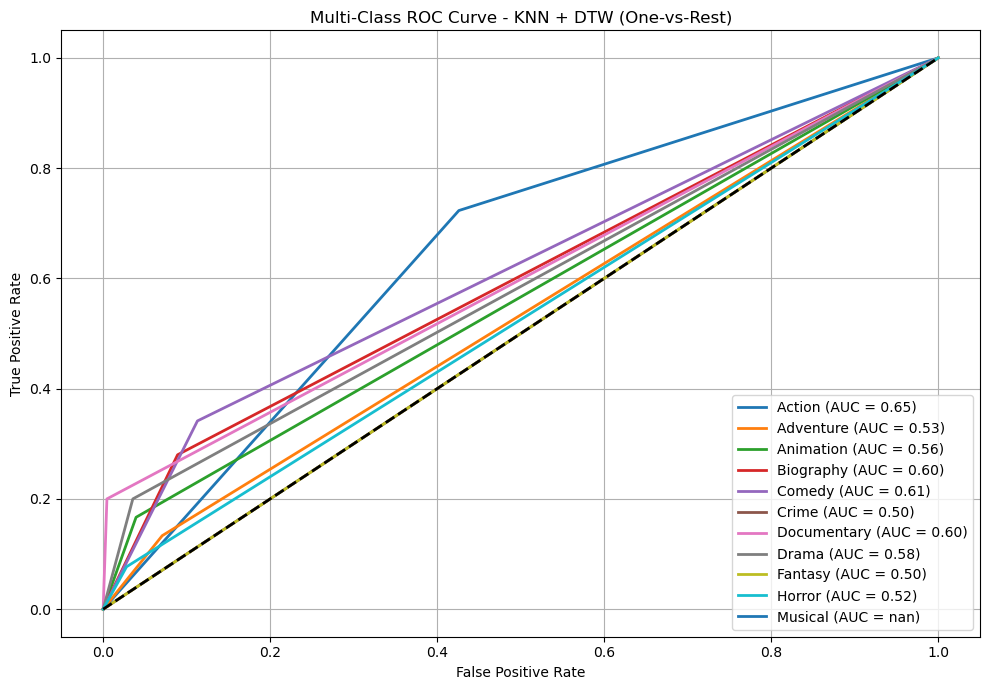

In [110]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# 1. Binarize target për ROC multi-class (OvR)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# 2. Vizato ROC për çdo klasë veç e veç
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - KNN + DTW (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

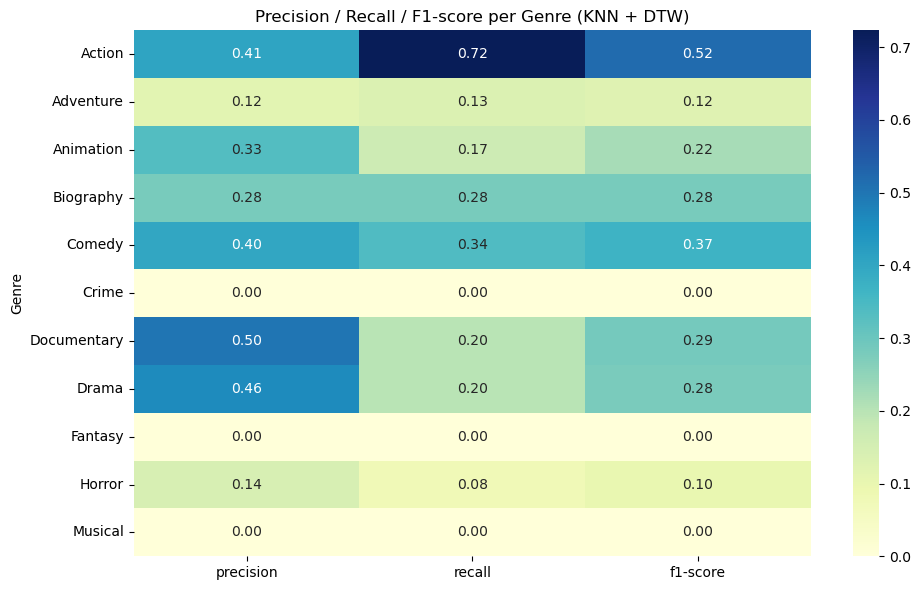

In [111]:
from sklearn.metrics import classification_report
import pandas as pd

# Merr raportin si dictionary për përdorim më të mirë
report = classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_,
    output_dict=True
)

# Ktheje në DataFrame për vizualizim më të lehtë
report_df = pd.DataFrame(report).T

# Filtrimi për klasat e targetit (jo 'accuracy', 'macro avg', etj.)
report_df = report_df.iloc[:-3]  # heq rreshtat e fundit që janë mesatare

# Shfaq tabelën
report_df = report_df[['precision', 'recall', 'f1-score']]
report_df.index.name = 'Genre'
report_df.reset_index(inplace=True)

# Vizualizim si tabelë
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.set_index('Genre'), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Precision / Recall / F1-score per Genre (KNN + DTW)")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


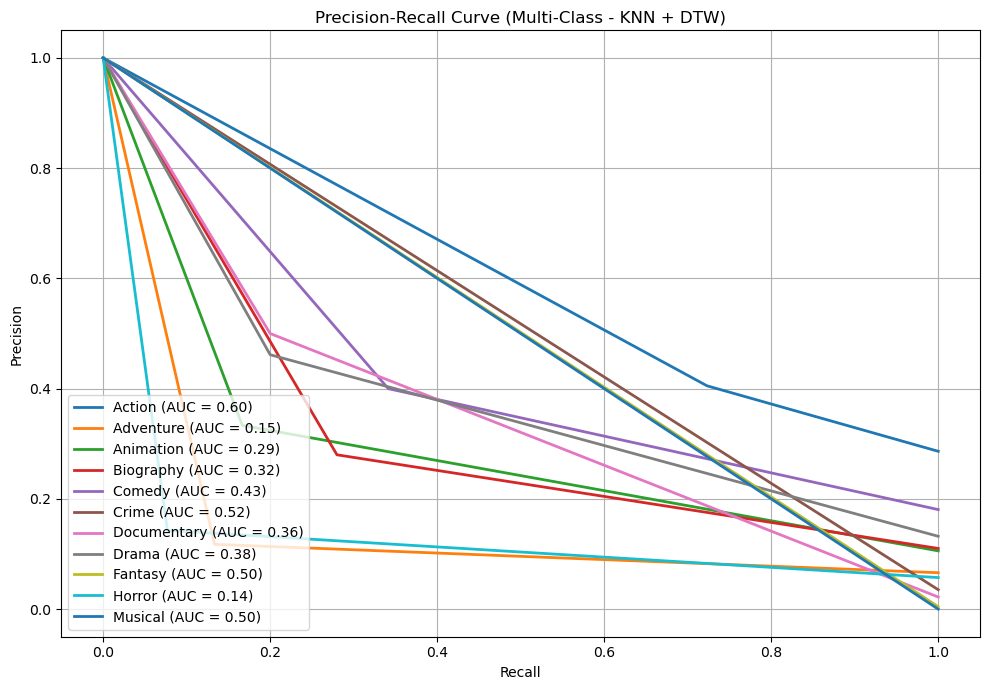

In [67]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize klasat për One-vs-Rest
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# Precision-Recall Curve
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f"{class_name} (AUC = {pr_auc:.2f})")

plt.title("Precision-Recall Curve (Multi-Class - KNN + DTW)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


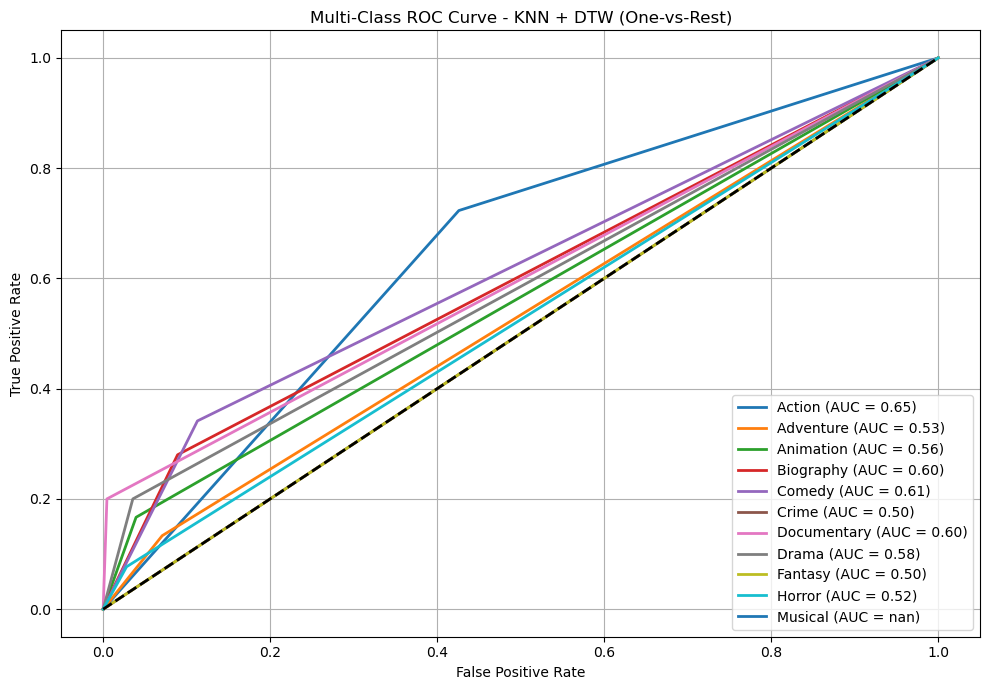

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizim për klasifikim multi-klasësh OvR
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# ROC curve multi-class (OvR)
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - KNN + DTW (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## knn per rating category

=== Classification Report (KNN + Euclidean) for rating_category ===
              precision    recall  f1-score   support

        High       0.56      0.61      0.59        75
         Low       0.00      0.00      0.00         2
      Medium       0.48      0.60      0.53        78
 Medium High       0.21      0.15      0.18        46
  Medium Low       0.43      0.23      0.30        26

    accuracy                           0.47       227
   macro avg       0.34      0.32      0.32       227
weighted avg       0.44      0.47      0.45       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


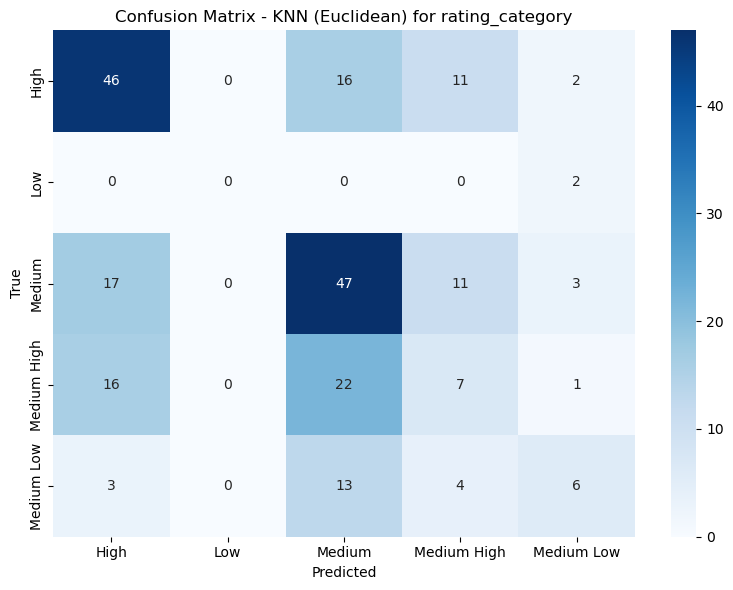

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Filtro rating categories që ndodhen ≥ 2 herë
rating_counts = df_ts['rating_category'].value_counts()
valid_ratings = rating_counts[rating_counts >= 2].index
mask = df_ts['rating_category'].isin(valid_ratings)

# 2. Përgatit të dhënat (100 dimensionet)
X = df_scaled.loc[mask, [str(i) for i in range(100)]].values
y_raw = df_ts.loc[mask, 'rating_category'].values

# 3. Label encoding për targetin
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Standardizim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN me Euclidean
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# 7. Classification Report
print("=== Classification Report (KNN + Euclidean) for rating_category ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN (Euclidean) for rating_category")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


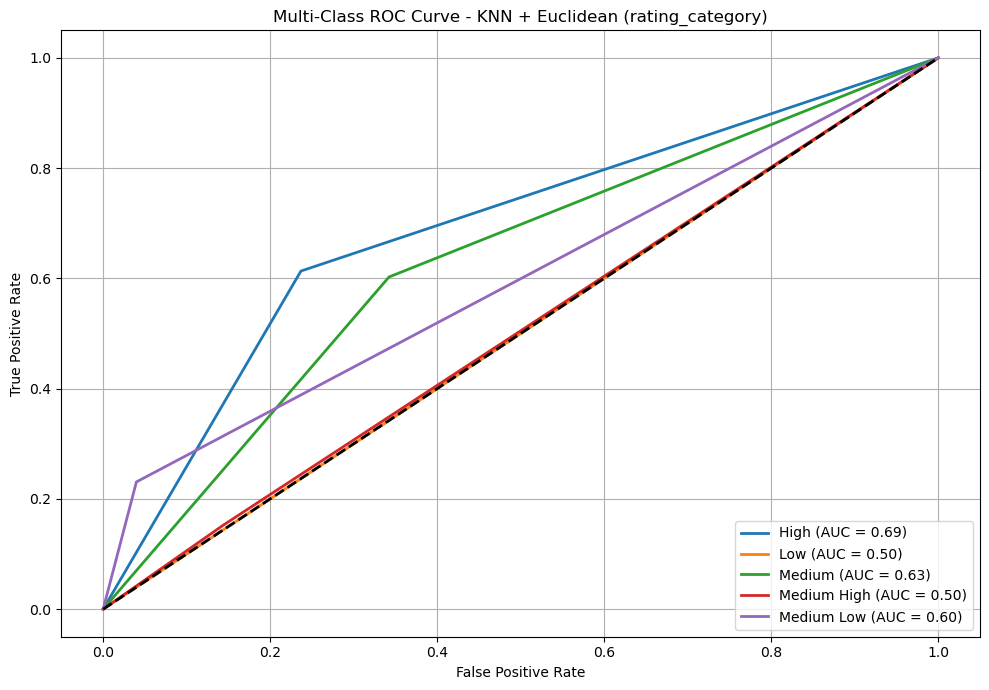

In [83]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Binarizo target për multi-class ROC (OvR)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# 2. ROC për çdo klasë
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - KNN + Euclidean (rating_category)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


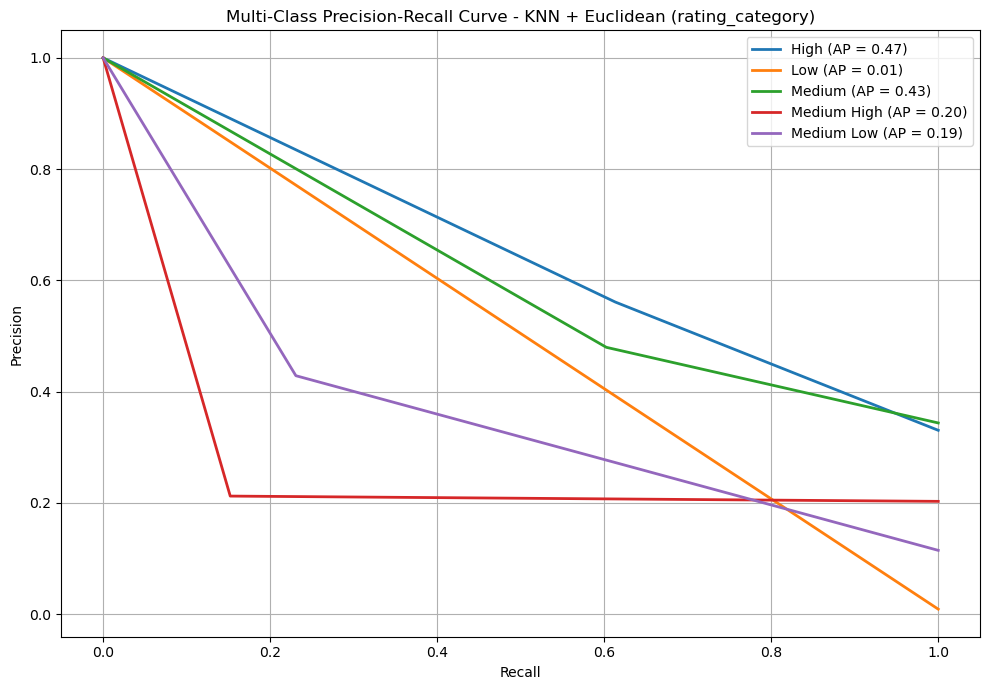

In [85]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Përdor y_test_bin dhe y_pred_bin të krijuar më parë
# (nëse nuk janë, ribëji me label_binarize si në ROC Curve)

plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, lw=2, label=f"{class_name} (AP = {avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multi-Class Precision-Recall Curve - KNN + Euclidean (rating_category)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


dtw

=== Classification Report (KNN + DTW) ===
              precision    recall  f1-score   support

        High       0.52      0.73      0.61        75
         Low       0.00      0.00      0.00         2
      Medium       0.50      0.50      0.50        78
 Medium High       0.37      0.22      0.27        46
  Medium Low       0.43      0.23      0.30        26

    accuracy                           0.48       227
   macro avg       0.36      0.34      0.34       227
weighted avg       0.47      0.48      0.46       227



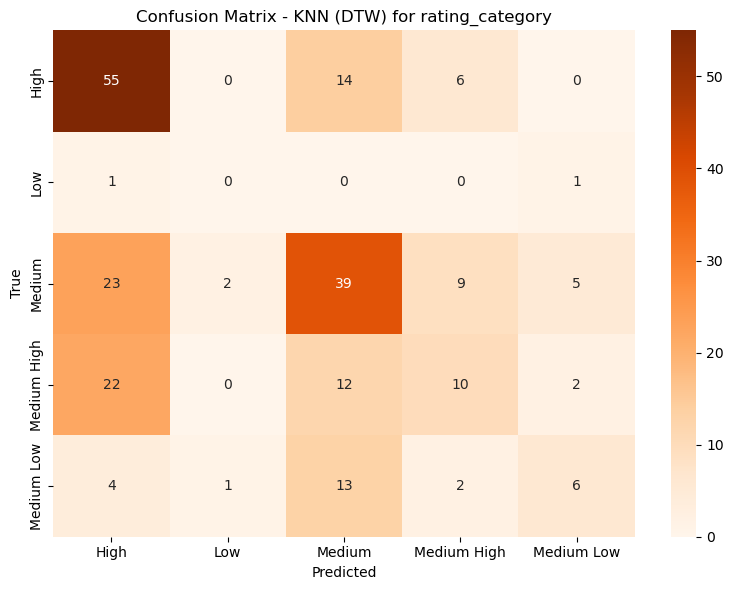

In [89]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesScalerMinMax

# 1. Filtro target-at që ndodhen ≥ 2 herë
rating_counts = df_ts['rating_category'].value_counts()
valid_ratings = rating_counts[rating_counts >= 2].index
mask = df_ts['rating_category'].isin(valid_ratings)

# 2. Përgatit të dhënat në 3D
X_raw = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype('float64')
X = X_raw.reshape((X_raw.shape[0], X_raw.shape[1], 1))  # (samples, timestamps, 1)
y_raw = df_ts.loc[mask, 'rating_category'].values

# 3. Label encoding
from sklearn.preprocessing import LabelEncoder
le_rating = LabelEncoder()
y = le_rating.fit_transform(y_raw)

# 4. Normalizim
scaler = TimeSeriesScalerMinMax()
X_scaled = scaler.fit_transform(X)

# 5. Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 6. KNN + DTW classifier
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train, y_train)
y_pred = knn_dtw.predict(X_test)

# 7. Report
from sklearn.metrics import classification_report, confusion_matrix
print("=== Classification Report (KNN + DTW) ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le_rating.classes_)),
    target_names=le_rating.classes_
))

# 8. Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_rating.classes_, yticklabels=le_rating.classes_)
plt.title("Confusion Matrix - KNN (DTW) for rating_category")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


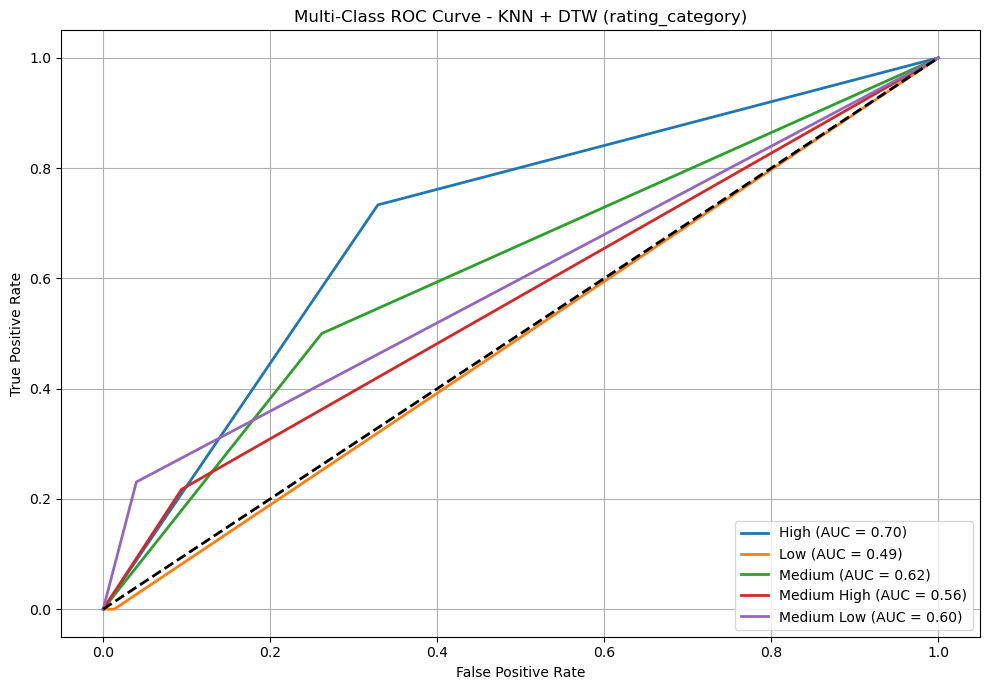

In [91]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarizim
y_test_bin = label_binarize(y_test, classes=np.arange(len(le_rating.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le_rating.classes_)))

# ROC curve
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(le_rating.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - KNN + DTW (rating_category)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


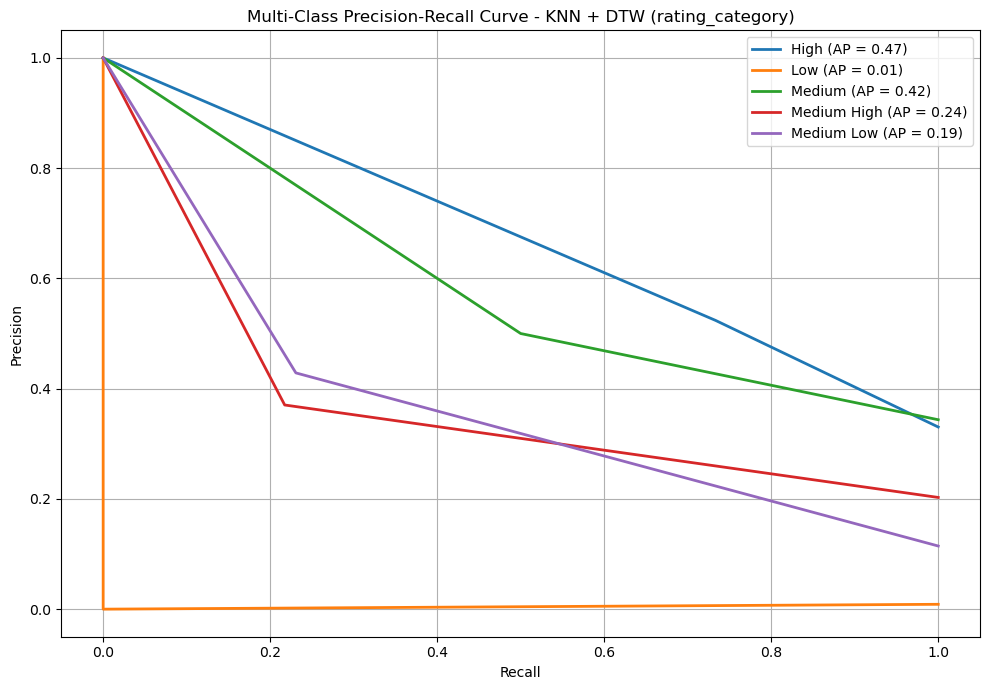

In [93]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 7))
for i, class_name in enumerate(le_rating.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, lw=2, label=f"{class_name} (AP = {avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multi-Class Precision-Recall Curve - KNN + DTW (rating_category)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Classification Report (Shapelets - rating_category) ===
              precision    recall  f1-score   support

        High       0.58      0.56      0.57        75
         Low       0.00      0.00      0.00         2
      Medium       0.43      0.63      0.51        78
 Medium High       0.20      0.11      0.14        46
  Medium Low       0.40      0.23      0.29        26

    accuracy                           0.45       227
   macro avg       0.32      0.31      0.30       227
weighted avg       0.42      0.45      0.42       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


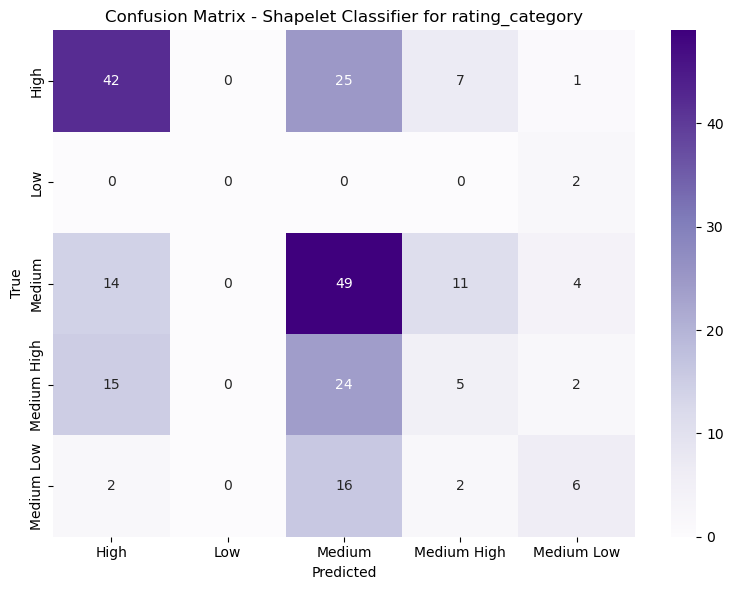

In [101]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sktime.datatypes._panel._convert import from_2d_array_to_nested
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Filtro target-at që ndodhen ≥ 2 herë
rating_counts = df_ts['rating_category'].value_counts()
valid_ratings = rating_counts[rating_counts >= 2].index
mask = df_ts['rating_category'].isin(valid_ratings)

# 2. Krijo X dhe y
X_raw = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype("float64")
y_raw = df_ts.loc[mask, "rating_category"].values

# 3. Kthe X në format të përshtatshëm për sktime
X = from_2d_array_to_nested(X_raw)

# 4. Label encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Model me shapelets (pa kontratë kohe)
model = ShapeletTransformClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# 7. Trajnim dhe predikim
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Classification report
print("=== Classification Report (Shapelets - rating_category) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 9. Confusion matrix vizuale
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Shapelet Classifier for rating_category")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


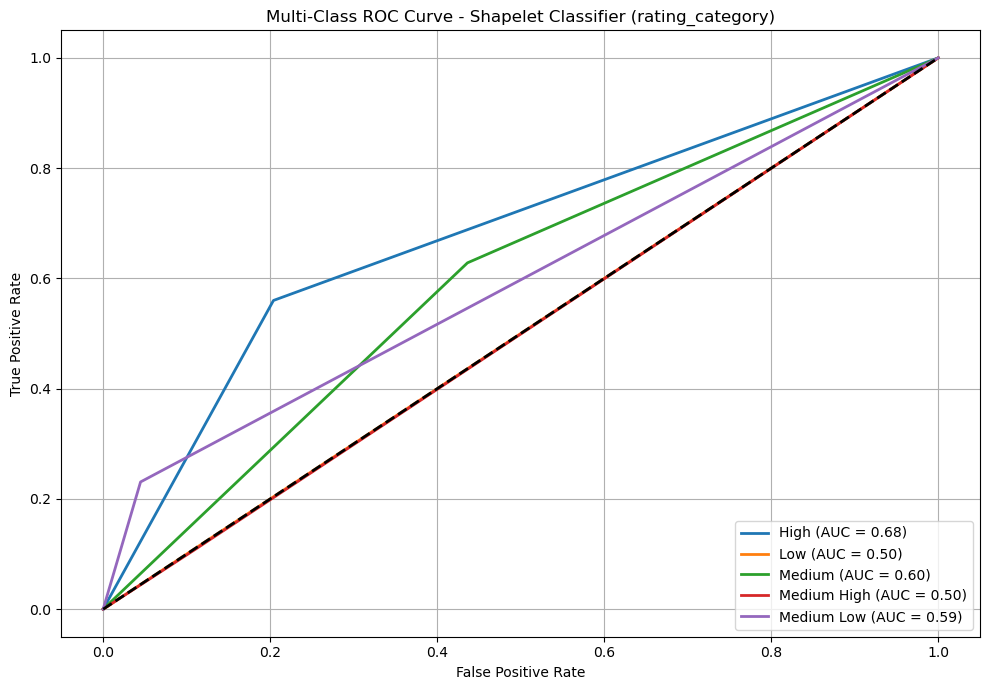

In [103]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Binarizo për multi-class (OvR)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

# 2. ROC Curve
plt.figure(figsize=(10, 7))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - Shapelet Classifier (rating_category)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### shaplet for main_genre

=== Classification Report (Shapelets - main_genre) ===
              precision    recall  f1-score   support

      Action       0.44      0.83      0.57        65
   Adventure       0.00      0.00      0.00        15
   Animation       0.44      0.29      0.35        24
   Biography       0.29      0.16      0.21        25
      Comedy       0.30      0.39      0.34        41
       Crime       0.00      0.00      0.00         8
 Documentary       1.00      0.20      0.33         5
       Drama       0.22      0.13      0.17        30
     Fantasy       0.00      0.00      0.00         1
      Horror       0.50      0.08      0.13        13

    accuracy                           0.38       227
   macro avg       0.32      0.21      0.21       227
weighted avg       0.34      0.38      0.32       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


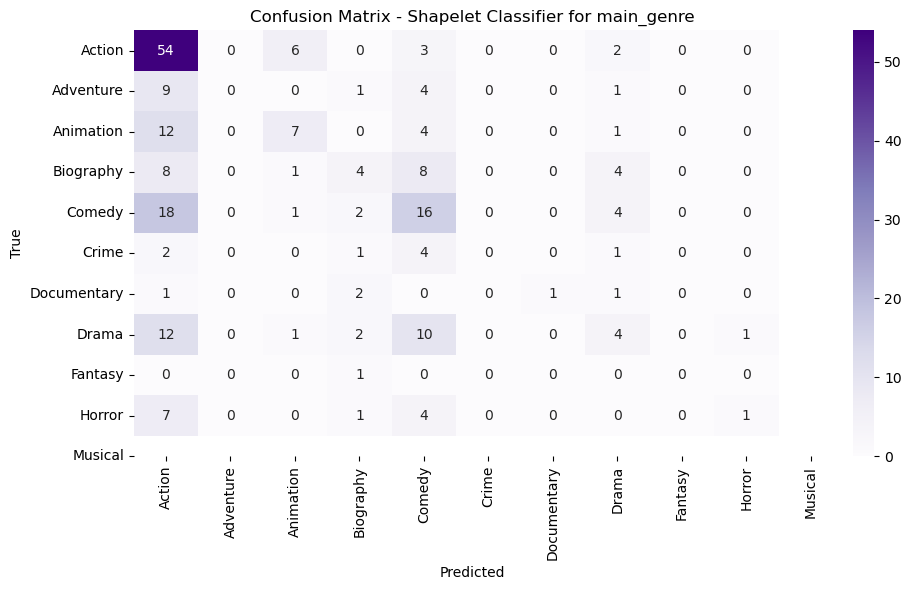

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


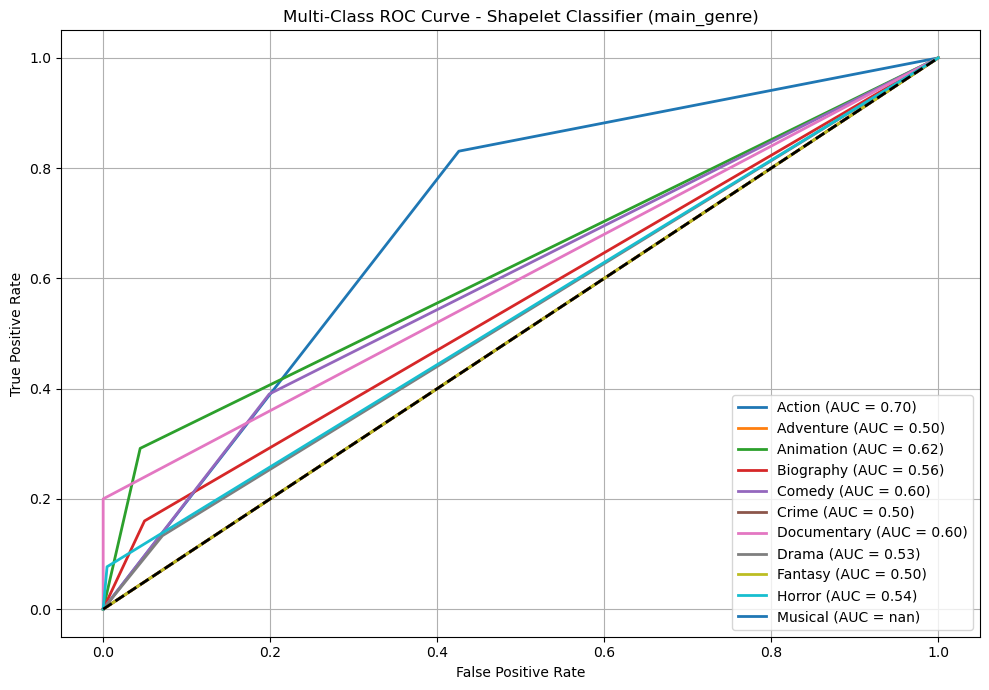

In [108]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sktime.datatypes._panel._convert import from_2d_array_to_nested
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Filtro target-at që ndodhen ≥ 2 herë
genre_counts = df_ts['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

# 2. Krijo X dhe y
X_raw = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype("float64")
y_raw = df_ts.loc[mask, "main_genre"].values

# 3. Konverto X në format të përshtatshëm për sktime
X = from_2d_array_to_nested(X_raw)

# 4. Label encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Modeli
model = ShapeletTransformClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Classification Report
print("=== Classification Report (Shapelets - main_genre) ===")
labels_present = np.unique(y_test)
print(classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=le.classes_[labels_present]
))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Shapelet Classifier for main_genre")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 9. ROC Curve (Multi-class OvR)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(le.classes_)))

plt.figure(figsize=(10, 7))
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-Class ROC Curve - Shapelet Classifier (main_genre)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [116]:
# Ruaj dataframe-in df_ts në një file CSV
df_ts.to_csv("time_series_cleaned_final_fund.csv", index=False)


### SHAPE BASED CLASSIFIER

In [150]:
pip uninstall sktime


Found existing installation: sktime 0.27.0
Uninstalling sktime-0.27.0:
  Would remove:
    /opt/anaconda3/lib/python3.12/site-packages/build_tools/changelog.py
    /opt/anaconda3/lib/python3.12/site-packages/build_tools/make_release.py
    /opt/anaconda3/lib/python3.12/site-packages/docs/Makefile
    /opt/anaconda3/lib/python3.12/site-packages/docs/make.bat
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_static/css/custom.css
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_static/css/fields.css
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_static/js/dynamic_table.js
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_templates/class.rst
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_templates/class_with_call.rst
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_templates/function.rst
    /opt/anaconda3/lib/python3.12/site-packages/docs/source/_templates/layout.html
    /opt/anaconda3/lib/python3.12/site-packages

In [158]:
pip install sktime==0.26.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sktime
    Found existing installation: sktime 0.27.0
    Uninstalling sktime-0.27.0:
      Successfully uninstalled sktime-0.27.0
Note: you may need to restart the kernel to use updated packages.


In [160]:
from sktime.classification.kernel_based import MiniRocketClassifier


ImportError: cannot import name 'MiniRocketClassifier' from 'sktime.classification.kernel_based' (/opt/anaconda3/lib/python3.12/site-packages/sktime/classification/kernel_based/__init__.py)

In [162]:
python3.10 -m venv ts_env
source ts_env/bin/activate


SyntaxError: invalid syntax (3120634060.py, line 1)

In [134]:
from sktime.transformations.panel.rocket import MiniRocket
from sktime.classification.kernel_based import RocketClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sktime.datatypes._panel._convert import from_2d_array_to_nested
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Filtrim
genre_counts = df_ts['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

# 2. Përgatitja e të dhënave
X_raw = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype("float64")
X = from_2d_array_to_nested(X_raw)
y_raw = df_ts.loc[mask, "main_genre"].values

# 3. Label encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. ROCKET klasifikuesi
clf = RocketClassifier(estimator=RidgeClassifierCV())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 6. Classification report
print("=== Classification Report (MiniRocket + RidgeClassifier) for main_genre ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - MiniRocket + RidgeClassifier (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


TypeError: RocketClassifier.__init__() got an unexpected keyword argument 'estimator'

In [142]:

from sktime.classification.kernel_based import RocketClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sktime.datatypes._panel._convert import from_2d_array_to_nested
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Filtrim
genre_counts = df_ts['main_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

# 2. Përgatitja e të dhënave
X_raw = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype("float64")
X = from_2d_array_to_nested(X_raw)
y_raw = df_ts.loc[mask, "main_genre"].values

# 3. Label encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sktime.classification.kernel_based import ROCKETClassifier

clf = ROCKETClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 6. Classification report
print("=== Classification Report (MiniRocket + RidgeClassifier) for main_genre ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - MiniRocket + RidgeClassifier (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


ImportError: cannot import name 'ROCKETClassifier' from 'sktime.classification.kernel_based' (/opt/anaconda3/lib/python3.12/site-packages/sktime/classification/kernel_based/__init__.py)

#### Muse

In [5]:
!pip install sktime==0.27.0


  Using cached sktime-0.27.0-py3-none-any.whl.metadata (29 kB)
Using cached sktime-0.27.0-py3-none-any.whl (21.9 MB)
  Attempting uninstall: sktime
    Found existing installation: sktime 0.26.0
    Uninstalling sktime-0.26.0:
      Successfully uninstalled sktime-0.26.0


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Sktime imports (vetëm për versionin 0.8.0)
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sktime.classification.feature_based import MUSEClassifier

# 1. Lexo CSV-në
df = pd.read_csv("time_series_cleaned_final_fund.csv")

# 2. Filtrim për klasat me ≥ 2 filma
valid = df['main_genre'].value_counts()
valid_genres = valid[valid >= 2].index
df = df[df['main_genre'].isin(valid_genres)]

# 3. Nxirr X dhe y
X_raw = df[[str(i) for i in range(100)]].values.astype("float64")
X = from_2d_array_to_nested(X_raw)
y_raw = df['main_genre'].values

# 4. Encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. MUSEClassifier
clf = MUSEClassifier(n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 7. Report
print("=== Classification Report (MUSEClassifier) for main_genre ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - MUSEClassifier (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


ImportError: cannot import name 'MUSEClassifier' from 'sktime.classification.feature_based' (/opt/anaconda3/lib/python3.12/site-packages/sktime/classification/feature_based/__init__.py)

In [ ]:
from sktime.classification.dictionary_based import MUSE
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Filtro target-at me ≥ 2 raste
valid_genres = df_ts['main_genre'].value_counts()[lambda x: x >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

X_array = df_scaled.loc[mask, [str(i) for i in range(100)]].values
y_raw = df_ts.loc[mask, 'main_genre'].values

# 2. Kodim
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 3. Konvertim në nested format
X_nested = from_2d_array_to_nested(X_array)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_nested, y, test_size=0.2, stratify=y, random_state=42)

# 5. MUSE Classifier
clf = MUSE(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 6. Raporti
print("=== Classification Report (MUSE) ===")
print(classification_report(
    y_test, y_pred,
    labels=np.arange(len(le.classes_)),
    target_names=le.classes_
))

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - MUSE (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


#### Cnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtro klasat me ≥2 filma
valid_genres = df_ts['main_genre'].value_counts()[lambda x: x >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

X = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype('float32')
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, 1 channel)

y_raw = df_ts.loc[mask, 'main_genre'].values
le = LabelEncoder()
y = le.fit_transform(y_raw)
y_cat = to_categorical(y)  # one-hot për output

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# 3. Modeli CNN
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(100, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Trajnim
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# 5. Predikime
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# 6. Raporti
print("=== Classification Report (CNN) ===")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

# 7. Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - CNN (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtro zhanret me ≥2 raste
valid_genres = df_ts['main_genre'].value_counts()[lambda x: x >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

X = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype('float32')
X = X.reshape((X.shape[0], 100, 1))

y_raw = df_ts.loc[mask, 'main_genre'].values
le = LabelEncoder()
y = le.fit_transform(y_raw)
y_cat = to_categorical(y)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# 3. CNN i lehtë për Mac M2
model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(100, 1)),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Trajnim më i lehtë për memorie
model.fit(X_train, y_train, epochs=10, batch_size=8, verbose=1)

# 5. Predikim & raport
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("=== Classification Report (CNN - Light) ===")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

# 6. Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Light CNN (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow-macos tensorflow-metal


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtro klasat me ≥2 filma
valid_genres = df_ts['main_genre'].value_counts()[lambda x: x >= 2].index
mask = df_ts['main_genre'].isin(valid_genres)

X = df_scaled.loc[mask, [str(i) for i in range(100)]].values.astype('float32')
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, 1)

y_raw = df_ts.loc[mask, 'main_genre'].values
le = LabelEncoder()
y = le.fit_transform(y_raw)
y_cat = to_categorical(y)  # one-hot encoding

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# 3. LSTM model
model = Sequential([
    LSTM(64, input_shape=(100, 1), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Trajnimi
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# 5. Predikimet
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# 6. Raporti
print("=== Classification Report (RNN - LSTM) ===")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

# 7. Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - LSTM (main_genre)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [85]:
# 1. Importimet
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform
from sktime.datatypes._panel._convert import from_2d_array_to_nested

# 2. Gjenero të dhëna artificiale (200 mostra, 50 pika kohore)
rng = np.random.RandomState(42)
n_instances = 200
n_timepoints = 50

# Gjenero 2 klasa me sinjale të ndryshme
X_data = []
y_data = []

for i in range(n_instances):
    if i < n_instances // 2:
        signal = np.sin(np.linspace(0, 3 * np.pi, n_timepoints)) + rng.normal(0, 0.2, n_timepoints)
        y_data.append(0)
    else:
        signal = np.cos(np.linspace(0, 3 * np.pi, n_timepoints)) + rng.normal(0, 0.2, n_timepoints)
        y_data.append(1)
    X_data.append(signal)

# 3. Konverto në format të pranuar nga sktime
X_df = from_2d_array_to_nested(np.array(X_data))
y = np.array(y_data)

# 4. Ndaje në train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Shapelet transformues dhe klasifikues
shapelet_transform = RandomShapeletTransform(
    n_shapelet_samples=50,
    max_shapelets=10,
    min_shapelet_length=2,
    random_state=42
)

clf_shapelet = ShapeletTransformClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3),
    transformer=shapelet_transform
)

# 6. Trajno dhe vlerëso
clf_shapelet.fit(X_train, y_train)
y_pred = clf_shapelet.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


TypeError: ShapeletTransformClassifier.__init__() got an unexpected keyword argument 'transformer'

## sequential pattern mining

In [4]:
!pip install pyts


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.0 MB/s eta 0:00:00a 0:00:01


In [32]:
from pyts.approximation import SymbolicAggregateApproximation

# X_raw: matrica 2D me vlerat numerike të time series (p.sh. nga kolona '0' deri '99')
X_raw = df_ts[[str(i) for i in range(100)]].values.astype("float64")

# Discretization me SAX në 4 simbole ('a', 'b', 'c', 'd')
sax = SymbolicAggregateApproximation(n_bins=4, strategy='quantile')
X_sax = sax.fit_transform(X_raw)

# Kontroll i parë
print("Shembull rreshti të discretizuar:", X_sax[0])


Shembull rreshti të discretizuar: ['d' 'd' 'd' 'd' 'd' 'd' 'd' 'c' 'c' 'd' 'd' 'd' 'c' 'c' 'c' 'c' 'd' 'd'
 'd' 'd' 'd' 'c' 'c' 'b' 'b' 'a' 'a' 'a' 'b' 'c' 'd' 'c' 'c' 'b' 'a' 'a'
 'a' 'a' 'b' 'a' 'a' 'a' 'b' 'c' 'd' 'd' 'd' 'd' 'c' 'b' 'b' 'b' 'c' 'c'
 'b' 'a' 'b' 'c' 'c' 'd' 'd' 'd' 'd' 'c' 'b' 'c' 'c' 'c' 'b' 'c' 'c' 'b'
 'b' 'c' 'd' 'c' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'a' 'a' 'a' 'a' 'a' 'a' 'a'
 'b' 'b' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'b']


In [36]:
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.4 MB/s eta 0:00:00


In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

# Kthe çdo rresht në një listë simbolesh (transaksion)
transactions = X_sax.tolist()

# Përgatitje për apriori
te = TransactionEncoder()
df_encoded = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

# Apriori mining
frequent_patterns = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Shfaq top 10 më të shpeshtat
frequent_patterns.sort_values('support', ascending=False).head(10)


support itemsets
0      1.0      (a)
1      1.0      (b)
2      1.0      (c)
3      1.0      (d)
4      1.0   (b, a)
5      1.0   (a, c)
6      1.0   (d, a)
7      1.0   (b, c)
8      1.0   (d, b)
9      1.0   (d, c)

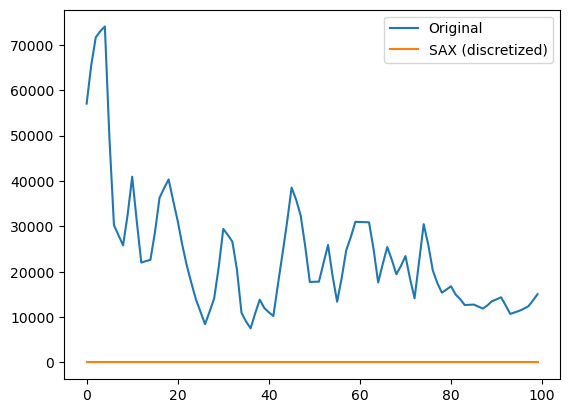

In [40]:
plt.plot(X_raw[0], label='Original')
plt.step(range(len(X_sax[0])), [ord(c)-97 for c in X_sax[0]], label='SAX (discretized)')
plt.legend()


In [42]:
from collections import Counter

pairs = []
for row in X_sax:
    pairs += list(zip(row[:-1], row[1:]))

transitions = Counter(pairs)


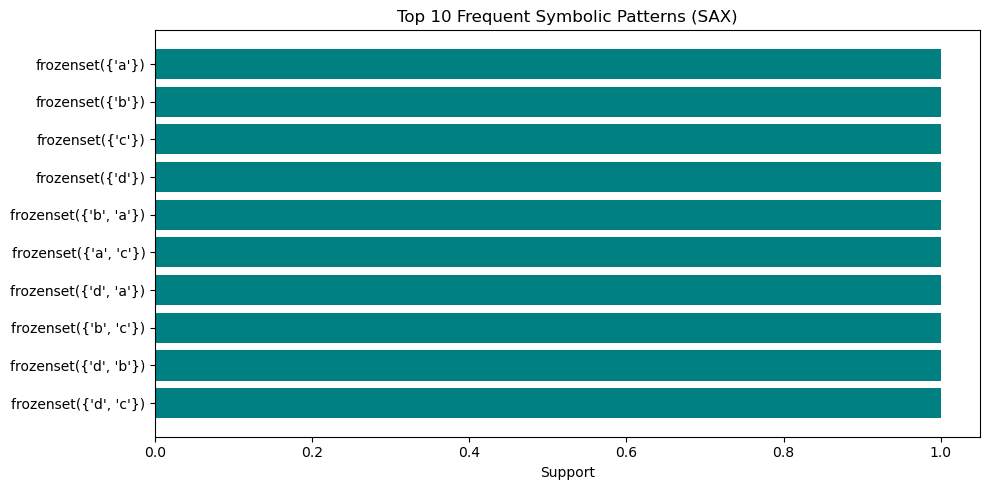

In [44]:
import matplotlib.pyplot as plt

top_patterns = frequent_patterns.sort_values("support", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(
    top_patterns["itemsets"].astype(str),
    top_patterns["support"],
    color="teal"
)
plt.xlabel("Support")
plt.title("Top 10 Frequent Symbolic Patterns (SAX)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [48]:
transactions = df_ts.apply(lambda row: [str(s) for s in row.values], axis=1).tolist()


In [52]:
window_size = 3
transactions = []

for row in df_ts.values:
    row_seq = [str(sym) for sym in row]
    row_trans = [
        tuple(row_seq[i:i+window_size])
        for i in range(len(row_seq) - window_size + 1)
    ]
    transactions.append(row_trans)


In [54]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

# Flatten to one list of items per time series
flat_transactions = [[f"{x[0]}_{x[1]}_{x[2]}" for x in row] for row in transactions]

te = TransactionEncoder()
te_ary = te.fit(flat_transactions).transform(flat_transactions)
df_freq = pd.DataFrame(te_ary, columns=te.columns_)

frequent_patterns = apriori(df_freq, min_support=0.1, use_colnames=True)
frequent_patterns = frequent_patterns.sort_values("support", ascending=False)


In [56]:
!pip install mlxtend


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=45375) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()
